In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS
import pathlib
from pathlib import Path
from shapely import wkt
from tqdm import tqdm
import timeit
# set the working directory
BASE_DIR = Path.cwd()
import seaborn as sns
import random
import branca
# define the exported folder path
# Check if folder exists
folder_path = pathlib.Path(BASE_DIR.parent.joinpath("Exported_Files","census_tract","agg_network","Mar042022","CensusTract_FT_FullNetwork"))
folder_path.mkdir(parents=True, exist_ok=True)

# print(BASE_DIR)

In [19]:
# """
# Fetch SF Champ network both for year 2010, year 2016 and join the frames
# """
# # Keep only FT types representing real road-network
# def get_realnetwork(_df):
#     """
#     Keep only FT types representing real road-network
#     1: Fwy-Fwy Connector; 2: Freeway; 3: Expressway; 4: Collector; 5: Ramp; 6: Centroid Connector;
#     7: Major Arterial; 8: ; 9: Alley (only for DTA); 10: ; 11: Local; 12: Minor Arterial; 13: Bike only;
#     14: ; 15: Super Arterial
#     :param _df:
#     :return df:
#     """
#     df = _df.copy()
#     if isinstance(df,gpd.GeoDataFrame):
#         if "FT" in df.columns:
#             df = df.loc[df["FT"].isin([1,2,3,4,5,7,11,12,13,15])]
#     return df
# # create a new field to store Time-of-Day information
# def add_TOD_information(_df,TOD):
#     """
#     before concatenating dataframes, insert the TOD information as column value
#     :param _df:
#     :param TOD:
#     :return:
#     """
#     d = {}
#     if isinstance(_df,gpd.GeoDataFrame):
#         d["peak"] = TOD
#     return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)
# # select only road networks which are within the SF County boundary
# def clip_roadnetwork(_dfroadnetwork):
#     """
#     Overlay and clip the line features to get only features inside SF County Area
#     :param _dfroadnetwork:
#     :return:
#     """
#     dfPolygon = gpd.read_file(BASE_DIR.parent.joinpath("Data","SF_County","SFBay_Boundary.shp"))
#     dfPolygon=dfPolygon.to_crs("EPSG:4326")
#     dfroadnetwork = _dfroadnetwork.to_crs(4326).copy()
#     df = gpd.clip(dfroadnetwork,dfPolygon)
#     return df
#
# def getTotalCapacity(_df):
#     """
#     The "CAP" field is for per/hour; convert this to TOD period
#     :param _df:
#     :return:
#     """
#     df = _df.copy()
#     df["Tot_CAP"] = df["CAP"]
#     df.loc[(df["peak"]=="EV"),"Tot_CAP"]*=8.5
#     df.loc[(df["peak"]=="MD"),"Tot_CAP"]*=6.5
#     df.loc[(df["peak"]=="AM") | (df["peak"]=="PM") |(df["peak"]=="EA") ,"Tot_CAP"]*=3
#     return df
#
# def check_required_rdntwrk_colmns(_df):# road network
#     df = _df.copy()
#     d = {}
#     reqd_colmns = ['V1_1', 'V2_1', 'V3_1', 'V4_1', 'V5_1', 'V6_1', 'V7_1', 'V8_1', 'V9_1', 'V10_1',
#                    'V11_1', 'V12_1',"V13_1",'V14_1', 'V15_1',"V16_1",'V17_1', 'V18_1',"V19_1",
#                    'OOS', 'PUDO',
#                    'BUSVOL_AM', 'BUSVOL_AM', 'BUSVOL_MD', 'BUSVOL_PM', 'BUSVOL_EV', 'BUSVOL_EA',
#                    ]
#     for col in reqd_colmns:
#         if col not in df.columns:
#             d[col]=0
#     return pd.concat([df, pd.DataFrame(d, index=df.index)],axis=1)
#
# def get_freeflow_speed(_df):
#     df = _df.copy()
#     df.loc[df["FT"].isin([13]),"TIME"] = 16
#     df.loc[df["FT"].isin([13]),"CSPD_1"] = 16
#     df.loc[df["FT"].isin([1,5,8]),"ff_TIME"] = df["TIME"].multiply(1.3)
#     df.loc[df["FT"].isin([2,3,6,10,13]),"ff_TIME"] = df["TIME"].multiply(1.0)
#     df.loc[df["FT"].isin([4,7,9,11,12,14,15]),"ff_TIME"] = df["TIME"].multiply(1.8)
#
#     df.loc[:,"ff_SPEED"] = (df["DISTANCE"].divide(df["ff_TIME"]))*60
#
#     # if _df["FT"].isin ([4,7,9,11,12,14,15]):
#     #     return _df.SPEED*1.3
#     # elif _df["FT"].isin ([2,3,6,10,13]):
#     #     return _df.SPEED*1.0
#     # elif _df["FT"].isin ([4,7,9,11,12,14,15]):
#     #     return _df.SPEED*1.8
#     return df.copy()
#
# # def get_VMT(_df,_yr):
# #     #remember to rename DISTANCE variable (as this is no longer the actual distance (in miles), given that feature is split-up)
# #     d = {}
# #     if isinstance(_df,gpd.GeoDataFrame):
# #         d["Tot_VMT"] = _df["Tot_Vol"] * _df.geometry.length
# #         d["Year"] = _yr
# #     return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)
#
# def get_revised_fields(_df):
#     # d = {}
#     df = _df.copy()
#     add_for_Tot_Vol = ['V1_1', 'V2_1', 'V3_1', 'V4_1', 'V5_1', 'V6_1', 'V7_1', 'V8_1', 'V9_1', 'V10_1', 'V11_1', 'V12_1',
#                        'V13_1','V14_1','V15_1','V16_1','V17_1','V18_1','V19_1',
#                        'BUSVOL_AM','BUSVOL_PM','BUSVOL_EA','BUSVOL_MD','BUSVOL_EV','OOS']
#
#     if isinstance(df,gpd.GeoDataFrame):
#         # Tot Volume fields
#         df.loc[:,"Tot_Vol"] = df[add_for_Tot_Vol].sum(axis=1)
#         df.loc[:,"Tot_TNC_Vol"] = (df[["OOS","V13_1"]].sum(axis=1))
#         df.loc[:,"Tot_Non_TNC_Vol"] = df["Tot_Vol"] - (df[["OOS","V13_1"]].sum(axis=1))
#         # Tot VMT fields
#         df.loc[:,"Tot_VMT"] = df[add_for_Tot_Vol].sum(axis=1)* df.geometry.length * 0.000621371
#         df.loc[:,"Tot_Non_TNC_VMT"] = df["Tot_VMT"] - ((df[["OOS","V13_1"]].sum(axis=1)) * (df.geometry.length * 0.000621371))
#         df.loc[:,"Tot_TNC_VMT"] = ((df[["OOS","V13_1"]].sum(axis=1)) * (df.geometry.length * 0.000621371))
#
#         # d["Tot_Vol"] = _df[add_for_Tot_Vol].sum(axis=1)
#         # d["Tot_TNC_Vol"] = (_df[["OOS","V13_1"]].sum(axis=1))
#         # d["Tot_Non_TNC_Vol"] = d["Tot_Vol"] - (_df[["OOS","V13_1"]].sum(axis=1))
#         # # Tot VMT fields
#         # d["Tot_VMT"] = d["Tot_Vol"] * _df.geometry.length * 0.000621371
#         # d["Tot_Non_TNC_VMT"] = d["Tot_VMT"] - ((_df[["OOS","V13_1"]].sum(axis=1)) * (_df.geometry.length * 0.000621371))
#         # d["Tot_TNC_VMT"] = ((_df[["OOS","V13_1"]].sum(axis=1)) * (_df.geometry.length * 0.000621371))
#         # Other necessary fields
#         df.loc[:,"GIS_length_mil"] = df.geometry.length * 0.000621371
#         df.loc[:,"ff_TIME"] = (df["GIS_length_mil"].divide(df["ff_SPEED"]))*60
#         df.loc[:,"cspd_time"] = (df["GIS_length_mil"].divide(df["CSPD_1"]))*60
#     return df
#
# def merge_TOD_dfs(_dfAM,_dfPM,_dfEA,_dfEV,_dfMD):
#     # clean the dataframe
#     dfAM = get_realnetwork(_dfAM.copy())
#     dfPM = get_realnetwork(_dfPM.copy())
#     dfEA = get_realnetwork(_dfEA.copy())
#     dfEV = get_realnetwork(_dfEV.copy())
#     dfMD = get_realnetwork(_dfMD.copy())
#     # clip road network
#     dfAM = clip_roadnetwork(dfAM.copy())
#     dfPM = clip_roadnetwork(dfPM.copy())
#     dfEA = clip_roadnetwork(dfEA.copy())
#     dfEV = clip_roadnetwork(dfEV.copy())
#     dfMD = clip_roadnetwork(dfMD.copy())
#     # add TOD information
#     dfAM = add_TOD_information(dfAM.copy(),"AM")
#     dfPM = add_TOD_information(dfPM.copy(),"PM")
#     dfEA = add_TOD_information(dfEA.copy(),"EA")
#     dfEV = add_TOD_information(dfEV.copy(),"EV")
#     dfMD = add_TOD_information(dfMD.copy(),"MD")
#     # concat dataframes
#     df = pd.concat([dfAM,dfPM,dfEA,dfEV,dfMD])
#     df.reset_index(drop=True,inplace=True)
#     # get total capacity on the link for the day
#     df = getTotalCapacity(df.copy())
#     df = check_required_rdntwrk_colmns(df.copy())
#     df.to_crs(3857,inplace=True)
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     df.fillna(0, inplace=True)
#     # get the revised free-flow speed: this is based on CUBE script shared by Dr. Erhardt
#     df = get_freeflow_speed(df.copy())
#     df = get_revised_fields(df.copy())
#     return df
#
# def agg_roadnetwrk(_dfmerged):
#     # aggregate the dataframe using A_B
#     wt_avg = lambda x: np.ma.average(x, weights = _dfmerged.loc[x.index, "Tot_VMT"],axis=0)
#
#     # aggregate function
#     def agg_func(_dfagg):
#         lst_col = ["SPEED","TIME","TIME_1","CSPD_1","ff_TIME","cspd_time","ff_SPEED"]
#         # average the columns
#         avg_col = [ 'DISTANCE',
#                     "FT","AT",
#                     'TIMESEED',
#                     'LANE_AM', 'LANE_OP', 'LANE_PM', 'BUSLANE_AM', 'BUSLANE_OP', 'BUSLANE_PM',
#                     'TOLLAM_DA', 'TOLLAM_SR2', 'TOLLAM_SR3', 'TOLLPM_DA', 'TOLLPM_SR2', 'TOLLPM_SR3',
#                     'TOLLEA_DA', 'TOLLEA_SR2', 'TOLLEA_SR3', 'TOLLMD_DA', 'TOLLMD_SR2', 'TOLLMD_SR3', 'TOLLEV_DA',
#                     'TOLLEV_SR2', 'TOLLEV_SR3',"USE","GIS_length_mil"]
#         d = {}
#         for col in _dfagg.select_dtypes(np.number).columns:
#             if col in lst_col:
#                 d[col] = wt_avg
#             elif col in avg_col:
#                 d[col]="mean"
#             else:
#                 d[col] = "sum"
#         for col in _dfagg.select_dtypes(object).columns:
#             d[col] = "first"
#         d["geometry"] = "first"
#         return d
#
#     _dfmerged.loc[:,"A_B"] = _dfmerged["A"].astype(str)  + "_" + _dfmerged["B"].astype(str)
#     _dfmerged["A"] = _dfmerged["A"].astype(str)
#     _dfmerged["B"] = _dfmerged["B"].astype(str)
#
#     dfmerged_agg = _dfmerged.groupby(['A_B'],as_index=False).aggregate(agg_func(_dfmerged.copy())).copy()
#
#     return dfmerged_agg
#
# # Network for YR 2010
# dfsfrd2010 = merge_TOD_dfs(gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_AM.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_PM.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_EA.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_EV.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_MD.shp"))
#                            )
#
# # dfsfrd2010.loc[:,~dfsfrd2010.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2010.csv"))
# dfsfrd2010.fillna(0,inplace=True)
#
# dfsfrd2010agg = agg_roadnetwrk(dfsfrd2010.copy())
# # above merge converts the geo-dataframe to pandas dataframe. So re-convert it into geodataframe
# dfsfrdntwrk2010_agg = gpd.GeoDataFrame(dfsfrd2010agg, geometry=dfsfrd2010agg['geometry'])
# dfsfrdntwrk2010_agg = dfsfrdntwrk2010_agg.set_crs(3857)
# dfsfrdntwrk2010_agg.to_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2010_PCS.geojson"), driver='GeoJSON')
#
# # Network for YR 2016
# dfsfrd2016 = merge_TOD_dfs(gpd.read_file(BASE_DIR.parent.joinpath("2016","2016_AM.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2016","2016_PM.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2016","2016_EA.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2016","2016_EV.shp")),
#                            gpd.read_file(BASE_DIR.parent.joinpath("2016","2016_MD.shp"))
#                            )
# # dfsfrd2016.loc[:,~dfsfrd2016.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2016.csv"))
# dfsfrd2016agg = agg_roadnetwrk(dfsfrd2016.copy())
# # # above merge converts the geo-dataframe to pandas dataframe. So re-convert it into geodataframe
# dfsfrdntwrk2016_agg = gpd.GeoDataFrame(dfsfrd2016agg, geometry=dfsfrd2016agg['geometry'])
# dfsfrdntwrk2016_agg = dfsfrdntwrk2016_agg.set_crs(3857)
# dfsfrdntwrk2016_agg.to_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2016_PCS.geojson"), driver='GeoJSON')
#
# # intersect the road network with CensusTract file
# def intersect_CT_rdntwrk(_gpdCT, _gpdrdntwrkagg):
#     _gpdCT.to_crs(3857, inplace=True) # set its projection to EPSG:3857
#     _gpdrdntwrkagg.to_crs(3857, inplace=True)
#     res_intersection = _gpdrdntwrkagg.overlay(_gpdCT, how='intersection')
#     return res_intersection
#
# def drop_intersect_CT_rdntwrk_columns(_df):
#     df = _df.copy()
#     cols = ['TOLL', 'USE', 'AT','LANE_AM', 'LANE_OP', 'LANE_PM',
#             'BUSLANE_AM', 'BUSLANE_OP', 'BUSLANE_PM',
#             'TOLLAM_DA', 'TOLLAM_SR2', 'TOLLAM_SR3', 'TOLLPM_DA', 'TOLLPM_SR2', 'TOLLPM_SR3', 'TOLLEA_DA', 'TOLLEA_SR2', 'TOLLEA_SR3', 'TOLLMD_DA', 'TOLLMD_SR2', 'TOLLMD_SR3', 'TOLLEV_DA', 'TOLLEV_SR2', 'TOLLEV_SR3',
#             'VALUETOLL_', 'PASSTHRU',
#             'BUSTPS_AM', 'BUSTPS_OP', 'BUSTPS_PM', 'TSVA', 'BIKE_CLASS', 'PER_RISE', 'ONEWAY', 'DTA_EDIT_F', 'TOLLTIME', 'PHASE',
#             'AMBUSSAVE', 'MDBUSSAVE', 'PMBUSSAVE', 'EVBUSSAVE', 'EABUSSAVE',
#             'SPDC', 'CAPC', 'A', 'B', 'STREETNAME', 'TYPE', 'MTYPE', 'TSIN', 'PROJ', 'ACTION', 'AB', 'peak', 'statefp10', 'mtfcc10', 'name10', 'intptlat10', 'awater10', 'namelsad10', 'funcstat10', 'aland10', 'geoid10', 'intptlon10', 'countyfp10',
#             "V1T_1",'V2T_1', 'V3T_1',  'V4T_1', 'V5T_1','V6T_1', 'V7T_1','V8T_1', 'V9T_1',  'V10T_1', 'V11T_1', 'V12T_1', 'V13T_1', 'V14T_1','V15T_1', 'V16T_1', 'V17T_1','V18T_1', 'V19T_1', ]
#     df = df.drop([x for x in cols if x in df.columns], axis=1)
#     return df
#
# gdfsfct = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"))
#
# gdfsfrd2010ct_int = intersect_CT_rdntwrk(gdfsfct,dfsfrdntwrk2010_agg)
# gdfsfrd2010ct_int = drop_intersect_CT_rdntwrk_columns(gdfsfrd2010ct_int)
#
# gdfsfrd2016ct_int = intersect_CT_rdntwrk(gdfsfct,dfsfrdntwrk2016_agg)
# gdfsfrd2016ct_int =drop_intersect_CT_rdntwrk_columns(gdfsfrd2016ct_int)
#
# def update_ff_cspd(_df):
#     if isinstance(_df,gpd.GeoDataFrame):
#         # add_for_Tot_Vol = ['V1_1', 'V2_1', 'V3_1', 'V4_1', 'V5_1', 'V6_1', 'V7_1', 'V8_1', 'V9_1', 'V10_1', 'V11_1', 'V12_1',
#         #                    'V13_1','V14_1','V15_1','V16_1','V17_1','V18_1','V19_1',
#         #                    'BUSVOL_AM','BUSVOL_PM','BUSVOL_EA','BUSVOL_MD','BUSVOL_EV','OOS']
#         # _df.loc[:,"Tot_Vol"] = _df[add_for_Tot_Vol].sum(axis=1)
#         # _df.loc[:,"Tot_VMT"] = _df["Tot_Vol"] * _df.geometry.length * 0.000621371
#         # add_for_TNC_Vol = ['V13_1',"OOS",]
#         # _df.loc[:,"Tot_TNC_VMT"] = _df[add_for_TNC_Vol].sum(axis=1)
#         # _df.loc[:,"Tot_Non_TNC_VMT"]=_df["Tot_VMT"] - _df["Tot_TNC_VMT"]
#         _df.loc[:,"GIS_length_mil"] = _df.geometry.length * 0.000621371
#         _df.loc[:,"ff_TIME"] = (_df["GIS_length_mil"].divide(_df["ff_SPEED"]))*60
#         _df.loc[:,"cspd_time"] = (_df["GIS_length_mil"].divide(_df["CSPD_1"]))*60
#     return _df
#
# gdsfrd2010ct_rect = update_ff_cspd(gdfsfrd2010ct_int.copy())
# gdsfrd2016ct_rect = update_ff_cspd(gdfsfrd2016ct_int.copy())
#
# gdsfrd2010ct_rect.to_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2010_CT_PCS.geojson"), driver='GeoJSON')
# gdsfrd2016ct_rect.to_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2016_CT_PCS.geojson"), driver='GeoJSON')
#
# gdsfrd2010ct_rect.loc[:,~gdsfrd2010ct_rect.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"gdsfrd2010ct_rect.csv"))
# gdsfrd2016ct_rect.loc[:,~gdsfrd2016ct_rect.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"gdsfrd2016ct_rect.csv"))

In [20]:
# Check in QGIS if the re-projection is successful .i.e.
# 1. Both SFChamp_2010_agg.geojson and SFChamp_2016_agg.geojson into EPSG:3857, should ideally be named with _PCS suffix
# 2. The SF_CensusTract is also reprojected to EPSG:3857, and ideally also named with _PCS suffix

# After the above process do the following in QGIS
# 3. Road Crash for each year i.e. 2010 and 2016, convert it to EPSG:3857, name it SFCrash_2010_PCS.geojson & SFCrash_2016_PCS.geojson
# 4. Perform spatial intersection:
# Intersect with SF_CensusTract and RoadNetwork and name the output as SFChamp_201x_agg_CT_PCS.geojson
# Intersect road crashes with SF_Census Tract and name the output as SFCrash_201x_CT_PCS.geojson
# for both, keep "tractce" column from SF_Census Tract in the output file
# This ends QGIS manipulation

In [21]:
# additional notes
"""
We are grouping the crashes at two-levels
1. censustract/taz level
2. categorizing the crashes based on facility type

So,
the road crashes should be aggregated on
1. find the nearest link to which the crash could be attached (fld: A_B and D2NL<10)
2. create a unique identifier using  censustract_ID & FT of roadnetwork: tractce10_FT
3. aggregate all the road crashes attached to tractce10_FT
4. aggregate all road network attached to tractce10_FT
"""

'\nWe are grouping the crashes at two-levels\n1. censustract/taz level\n2. categorizing the crashes based on facility type\n\nSo,\nthe road crashes should be aggregated on\n1. find the nearest link to which the crash could be attached (fld: A_B and D2NL<10)\n2. create a unique identifier using  censustract_ID & FT of roadnetwork: tractce10_FT\n3. aggregate all the road crashes attached to tractce10_FT\n4. aggregate all road network attached to tractce10_FT\n'

In [22]:
def add_unique_ID_using_CT_FT(_df,CT_ID_fld,FT_fld):
    d = {}
    if isinstance(_df,gpd.GeoDataFrame):
        if f"{CT_ID_fld}_{FT_fld}" not in _df.columns:
            d[f"{CT_ID_fld}_{FT_fld}"] = _df[CT_ID_fld].astype(str) + "_" + _df[FT_fld].astype(int).astype(str)
        else:
            _df[f"{CT_ID_fld}_{FT_fld}"] = _df[CT_ID_fld].astype(str) + "_" + _df[FT_fld].astype(int).astype(str)
    return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)

def label_df_by_road_category(_df,fld):
    _df["category"]=0
    _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
    _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
    _df.loc[_df[fld].isin([11]),'category']="3"
    _df.loc[_df[fld].isin([13]),'category']="bike"
    return _df

# Fetch SF_Census Tract
SF_CT = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"), crs = "EPSG:3857")
SF_CT = SF_CT.to_crs(3857)

# read the merged road network files and containing CensusTract IDs
gdfsfrd2010ct_int= gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2010_CT_PCS.geojson"))
gdfsfrd2016ct_int= gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2016_CT_PCS.geojson"))

# categorize the road network by FacilityType
gdfsfrd2010ct = label_df_by_road_category(gdfsfrd2010ct_int.copy(),"FT")
gdfsfrd2016ct = label_df_by_road_category(gdfsfrd2016ct_int.copy(),"FT")

# Should I drop the "bike" category here or later???? I think here itself
gdfsfrd2010ct.drop(gdfsfrd2010ct.loc[gdfsfrd2010ct.FT==13].index, inplace=True)
gdfsfrd2016ct.drop(gdfsfrd2016ct.loc[gdfsfrd2016ct.FT==13].index, inplace=True)

# create a uniqueID using => tractce10_FT
gdfsfrd2010ct_ft = add_unique_ID_using_CT_FT(gdfsfrd2010ct.copy(),"tractce10","FT")
gdfsfrd2010ct_ft.replace([np.inf, -np.inf], np.nan, inplace=True)
gdfsfrd2010ct_ft.fillna(0, inplace=True)

gdfsfrd2016ct_ft = add_unique_ID_using_CT_FT(gdfsfrd2016ct.copy(),"tractce10","FT")
gdfsfrd2016ct_ft.replace([np.inf, -np.inf], np.nan, inplace=True)
gdfsfrd2016ct_ft.fillna(0, inplace=True)

def reqd_colmns(_df):# road network
    df = _df.copy()
    d = {}
    reqd_colmns = ['V1_1', 'V2_1', 'V3_1', 'V4_1', 'V5_1', 'V6_1', 'V7_1', 'V8_1', 'V9_1', 'V10_1',
                   'V11_1', 'V12_1', 'V13_1', 'V14_1', 'V15_1', 'V16_1', 'V17_1', 'V18_1', 'V19_1',
                   'OOS', 'PUDO',
                   'BUSVOL_AM', 'BUSVOL_AM', 'BUSVOL_MD', 'BUSVOL_PM', 'BUSVOL_EV', 'BUSVOL_EA',
                   'Tot_CAP', 'CAP',
                   'SPEED','CSPD_1',
                   'Tot_Vol','Tot_TNC_Vol','Tot_Non_TNC_Vol',
                   "Tot_VMT","Tot_TNC_VMT", "Tot_Non_TNC_VMT",
                   "GIS_length_mil",
                   "ff_TIME","cspd_time","ff_SPEED","TIME","TIME_1",
                   ]
    for col in reqd_colmns:
        if col not in df.columns:
            d[col]=0
    return pd.concat([df, pd.DataFrame(d, index=df.index)],axis=1)

def agg_network_by_uniqueIDs(_df,uniqueID):
    _df = reqd_colmns(_df.copy())
    _df.replace([np.inf, -np.inf], np.nan, inplace=True)
    _df.fillna(0, inplace=True)
    _df["FT"] = _df["FT"].astype(str)
    _df[uniqueID] = _df[uniqueID].astype(str)
    # aggregate the dataframe using A_B
    wt_avg = lambda x: np.ma.average(x, weights = _df.loc[x.index, "Tot_VMT"])
    # Aggregating rows based on one column with “, ”.join
    concat_agg = lambda ar: ', '.join([item for item in ar if item])
    def agg_func_rdntwrk(df):
        d = {}
        for col in df.select_dtypes(np.number).columns:
            if col in wt_col:
                d[col] = wt_avg
            else:
                d[col] = "sum"
        for col in df.select_dtypes(object).columns:
            if col in str_col:
                d[col] = "first"
            elif col=="FT":
                d[col] = concat_agg
        d["geometry"] = "first"
        return d

    # wt_col = ["SPEED","TIME","TIME_1","CSPD_1","ff_SPEED","rev_TIME"]
    wt_col = ["SPEED","CSPD_1","ff_SPEED"]
    str_col = ['tractce10_FT',"FT","category"]
    drop_col = [ "A_B",'tractce10','FT',]
    _df.drop(drop_col,axis=1,inplace=True)
    df = _df.groupby([uniqueID],as_index=False).aggregate(agg_func_rdntwrk(_df.copy())).copy()
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    return df

# def update_tot_VMT(_df):
#     df = _df.copy()
#     if isinstance(df,gpd.GeoDataFrame):
#         df["Tot_VMT"] = df["Tot_Vol"] * df.geometry.length * 0.000621371
#     return df

def update_ff_cspd(_df):
    if isinstance(_df,gpd.GeoDataFrame):
        _df["ff_TIME"] = (_df["GIS_length_mil"].divide(_df["ff_SPEED"]))*60
        _df["cspd_time"] = (_df["GIS_length_mil"].divide(_df["CSPD_1"]))*60
    return _df

gdfsfrd2010ct_cat_agg = (agg_network_by_uniqueIDs(gdfsfrd2010ct_ft.copy(),"tractce10_FT"))
gdfsfrd2010ct_cat_agg = update_ff_cspd(gdfsfrd2010ct_cat_agg.copy())
gdfsfrd2010ct_cat_agg.loc[:,~gdfsfrd2010ct_cat_agg.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2010_agg_CT.csv"))
# gdfsfrd2010ct_cat_agg = update_tot_VMT(gdfsfrd2010ct_cat_agg.copy())

gdfsfrd2016ct_cat_agg = (agg_network_by_uniqueIDs(gdfsfrd2016ct_ft.copy(),"tractce10_FT"))
gdfsfrd2016ct_cat_agg = update_ff_cspd(gdfsfrd2016ct_cat_agg.copy())
gdfsfrd2016ct_cat_agg.loc[:,~gdfsfrd2016ct_cat_agg.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path,"SFChamp_2016_agg_CT.csv"))
# gdfsfrd2016ct_cat_agg = update_tot_VMT(gdfsfrd2016ct_cat_agg.copy())

C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\numpy\ma\extras.py:623: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


In [23]:
# read the (Nearest Neighbour) road crash files and containing CensusTract IDs
gdfsfnncrash2010ct = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"NN_SFCrash_2010_CT_PCS.geojson"))
gdfsfnncrash2016ct = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"NN_SFCrash_2016_CT_PCS.geojson"))

# categorize the road crash by FacilityType
gdfsfrdcrash2010ct_cat = label_df_by_road_category(gdfsfnncrash2010ct.copy(),"FT")
gdfsfrdcrash2016ct_cat = label_df_by_road_category(gdfsfnncrash2016ct.copy(),"FT")

# recategorize all the crashes which have primary road information either as Highway or I-80,280,101 etc
CAT_1_FT = [1, 2, 3, 5]
random_num = random.choice(CAT_1_FT)
gdfsfnncrash2010ct.loc[gdfsfnncrash2010ct["PRIMARY_RD_3"].str.contains("HWY|I-",na=False) & (gdfsfnncrash2010ct["FT"].isin([4,7,12,15,11,13])),"FT"] = random.choice(CAT_1_FT)
gdfsfnncrash2016ct.loc[gdfsfnncrash2016ct["PRIMARY_RD_3"].str.contains("HWY|I-",na=False) & (gdfsfnncrash2016ct["FT"].isin([4,7,12,15,11,13])),"FT"] = random.choice(CAT_1_FT)

# Should I drop the "bike" category here or later???? I think here itself
gdfsfnncrash2010ct.drop(gdfsfnncrash2010ct.loc[gdfsfnncrash2010ct.FT==13].index, inplace=True)
gdfsfnncrash2016ct.drop(gdfsfnncrash2016ct.loc[gdfsfnncrash2016ct.FT==13].index, inplace=True)

# drop tractce10 and rename join_tractce10
gdfsfrdcrash2010ct_cat = gdfsfrdcrash2010ct_cat.loc[:,gdfsfrdcrash2010ct_cat.columns!="tractce10"].copy()
gdfsfrdcrash2010ct_cat.rename(columns={"join_tractce10":"tractce10"},inplace=True)
gdfsfrdcrash2016ct_cat = gdfsfrdcrash2016ct_cat.loc[:,gdfsfrdcrash2016ct_cat.columns!="tractce10"].copy()
gdfsfrdcrash2016ct_cat.rename(columns={"join_tractce10":"tractce10"},inplace=True)

def convert_categorical_variables_to_dummy_variables(_df,_field_list):
    """
    :param _df: this is the dataframe on which the action needs to be performed
    :param _field_list: these is column name list which needs to be converted from categorical values to dummy values (0: No, 1: Yes)
    :return: modified dataframe
    """
    # four variables: PEDESTRIAN_ACCIDENT, BICYCLE_ACCIDENT, MOTORCYCLE_ACCIDENT, TRUCK_ACCIDENT
    _df.loc[(_df["PEDESTRIAN_ACCIDENT"]=="Y") | (_df["PEDESTRIAN_ACCIDENT"]=="y"),"Pedestrian_Collision_Count" ] = 1
    _df.loc[(_df["BICYCLE_ACCIDENT"]=="Y") | (_df["BICYCLE_ACCIDENT"]=="y"),"Bicycle_Collision_Count" ] = 1
    _df.loc[(_df["MOTORCYCLE_ACCIDENT"]=="Y") | (_df["MOTORCYCLE_ACCIDENT"]=="y"),"MC_Collision_Count" ] = 1
    _df.loc[(_df["TRUCK_ACCIDENT"]=="Y") | (_df["TRUCK_ACCIDENT"]=="y"),"Truck_Collision_Count" ] = 1

    return _df

def drop_crash_columns(_df):
    """
    :param _df:
    :return: drop columns which are unnecessary
    """
    df = _df.copy()
    cols = ['ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE', 'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK', 'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE', 'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER', 'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY', 'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX', 'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY', 'TOW_AWAY', 'COLLISION_SEVERITY',  'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL', 'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION', 'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION', 'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING', 'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT', 'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT', 'NOT_PRIVATE_PROPERTY', 'ALCOHOL_INVOLVED', 'STWD_VEHTYPE_AT_FAULT', 'CHP_VEHTYPE_AT_FAULT', 'PRIMARY_RAMP', 'SECONDARY_RAMP', 'LATITUDE', 'LONGITUDE', 'COUNTY', 'CITY', 'POINT_X', 'POINT_Y', 'PRIMARY_RD_3', 'SECONDARY_RD_3', 'tractce10', 'FT',"CASE_ID"]
    df = df.drop([x for x in cols if x in df.columns], axis=1)
    return df

gdfsfrdcrash2010ct_cat = convert_categorical_variables_to_dummy_variables(gdfsfrdcrash2010ct_cat.copy(),['PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT',
                                                                                                         'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT'])

gdfsfrdcrash2016ct_cat = convert_categorical_variables_to_dummy_variables(gdfsfrdcrash2016ct_cat.copy(),['PEDESTRIAN_ACCIDENT', 'BICYCLE_ACCIDENT',
                                                                                                         'MOTORCYCLE_ACCIDENT', 'TRUCK_ACCIDENT'])


gdfsfrdcrash2010ct_ft = drop_crash_columns(add_unique_ID_using_CT_FT(gdfsfrdcrash2010ct_cat,"tractce10","FT"))
gdfsfrdcrash2016ct_ft = drop_crash_columns(add_unique_ID_using_CT_FT(gdfsfrdcrash2016ct_cat,"tractce10","FT"))

def min_D2NL(_df,dist):
    df = _df.loc[_df["D2NL"]<dist,:]
    return df

gdfsfrdcrash2010ct_ft = min_D2NL(gdfsfrdcrash2010ct_ft.copy(),10)
gdfsfrdcrash2016ct_ft = min_D2NL(gdfsfrdcrash2016ct_ft.copy(),10)

# aggregate crashes by uniqueID: category_tractce10
def agg_crash_by_uniqueIDs(_df,uniqueID):
    _df[uniqueID] = _df[uniqueID].astype(str)
    str_col = [uniqueID,"category"]
    # Aggregating rows based on one column with “, ”.join
    concat_agg = lambda ar: ', '.join([item for item in ar if item])
    def agg_func(df):
        d = {}
        for col in df.select_dtypes(np.number).columns:
            d[col] = "sum"
        for col in df.select_dtypes(object).columns:
            if col in str_col:
                d[col] = "first"
            else:
                d[col] = concat_agg
        return d
    df = _df.groupby([uniqueID],as_index=False).aggregate(agg_func(_df.copy())).copy()
    return df

gdfsfrdcrash2010ct_ft_agg = agg_crash_by_uniqueIDs(gdfsfrdcrash2010ct_ft,"tractce10_FT")
gdfsfrdcrash2010ct_ft_agg["Accident_Year"] = 2010
gdfsfrdcrash2016ct_ft_agg = agg_crash_by_uniqueIDs(gdfsfrdcrash2016ct_ft,"tractce10_FT")
gdfsfrdcrash2016ct_ft_agg["Accident_Year"] = 2016

In [24]:
# Fetch SF_Census Tract
gdfCycFacility2010 = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"NN_CycFacility_SFChamp2010.geojson"), crs = "EPSG:3857")
gdfCycFacility2016 = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"NN_CycFacility_SFChamp2016.geojson"), crs = "EPSG:3857")

#drop original CT ids
gdfCycFacility2010.drop(columns=["tractce10"],axis=1,inplace=True)
gdfCycFacility2016.drop(columns=["tractce10"],axis=1,inplace=True)

# rename columns
gdfCycFacility2010.rename(columns={"join_tractce10":"tractce10", "join_FT":"FT"},inplace=True)
gdfCycFacility2016.rename(columns={"join_tractce10":"tractce10", "join_FT":"FT"},inplace=True)

# categorize the features
gdfCycFacility2010 = label_df_by_road_category(gdfCycFacility2010.copy(),"FT")
gdfCycFacility2016 = label_df_by_road_category(gdfCycFacility2016.copy(),"FT")

gdfCycFacility2010_cat = add_unique_ID_using_CT_FT(gdfCycFacility2010.copy(),"tractce10","FT")
gdfCycFacility2016_cat = add_unique_ID_using_CT_FT(gdfCycFacility2016.copy(),"tractce10","FT")

def get_revised_cycle_length(_df):
    #remember to rename DISTANCE variable (as this is no longer the actual distance (in miles), given that feature is split-up)
    d = {}
    if isinstance(_df,gpd.GeoDataFrame):
        d["Length_meters"] = _df.geometry.length
        d["Length_miles"] = d["Length_meters"]* 0.000621371
    return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)

gdfCycFacility2010_cat = min_D2NL(get_revised_cycle_length(gdfCycFacility2010_cat),10)
gdfCycFacility2016_cat = min_D2NL(get_revised_cycle_length(gdfCycFacility2016_cat),10)

def agg_cycinfra_length(_df,_uniqueID,_yr):
    df = _df.loc[_df["install_year"]<=_yr].copy()
    df = df.groupby(_uniqueID).agg({"Length_miles":"sum"}).reset_index()
    return dict(zip(df[_uniqueID],df["Length_miles"]))

cycinfra_length_2010 = agg_cycinfra_length(gdfCycFacility2010_cat,"tractce10_FT",2010)
cycinfra_length_2016 = agg_cycinfra_length(gdfCycFacility2016_cat,"tractce10_FT",2016)

gdfsfrd2010ct_cat_agg["cycleinfra_length"] = gdfsfrd2010ct_cat_agg["tractce10_FT"].map(cycinfra_length_2010)
gdfsfrd2010ct_cat_agg["cycleinfra_length"].fillna(0, inplace=True)
gdfsfrd2016ct_cat_agg["cycleinfra_length"] = gdfsfrd2016ct_cat_agg["tractce10_FT"].map(cycinfra_length_2016)
gdfsfrd2016ct_cat_agg["cycleinfra_length"].fillna(0, inplace=True)

In [25]:
def dataframe_merge(_dfroadnetwork, _dfroadcrash,left_fld,right_fld):
    dfmerge = pd.merge(_dfroadnetwork,_dfroadcrash,left_on=left_fld,right_on=right_fld,how="left")
    return dfmerge

dfsf_rd_ntwrk_crash_2010_cat_agg = dataframe_merge(gdfsfrd2010ct_cat_agg,gdfsfrdcrash2010ct_ft_agg,"tractce10_FT","tractce10_FT")
d = {**dict.fromkeys(dfsf_rd_ntwrk_crash_2010_cat_agg.select_dtypes(np.number).columns, 0),
     **dict.fromkeys(dfsf_rd_ntwrk_crash_2010_cat_agg.select_dtypes(exclude=np.number).columns,np.nan)}
dfsf_rd_ntwrk_crash_2010_cat_agg =dfsf_rd_ntwrk_crash_2010_cat_agg.fillna(d)
dfsf_rd_ntwrk_crash_2010_cat_agg["Accident_Year"]=2010

dfsf_rd_ntwrk_crash_2016_cat_agg = dataframe_merge(gdfsfrd2016ct_cat_agg,gdfsfrdcrash2016ct_ft_agg,"tractce10_FT","tractce10_FT")
d = {**dict.fromkeys(dfsf_rd_ntwrk_crash_2016_cat_agg.select_dtypes(np.number).columns, 0),
     **dict.fromkeys(dfsf_rd_ntwrk_crash_2016_cat_agg.select_dtypes(exclude=np.number).columns,np.nan)}
dfsf_rd_ntwrk_crash_2016_cat_agg =dfsf_rd_ntwrk_crash_2016_cat_agg.fillna(d)
dfsf_rd_ntwrk_crash_2016_cat_agg["Accident_Year"]=2016


df2010 = dfsf_rd_ntwrk_crash_2010_cat_agg.loc[:,~dfsf_rd_ntwrk_crash_2010_cat_agg.columns.isin(["geometry"])].copy()
df2016 = dfsf_rd_ntwrk_crash_2016_cat_agg.loc[:,~dfsf_rd_ntwrk_crash_2016_cat_agg.columns.isin(["geometry"])].copy()
df2010.reset_index(drop=True, inplace=True)
df2016.reset_index(drop=True, inplace=True)

columns_to_retain = set(df2010.columns.to_list()).intersection(set(df2016.columns.to_list()))
dfmerged =pd.concat([df2010[columns_to_retain], df2016[columns_to_retain]], ignore_index=True,verify_integrity=True,copy=True,axis=0)
# dfmerged_mod = add_custom_fields(dfmerged)
dfmerged.replace([np.inf, -np.inf], np.nan, inplace=True)
dfmerged.fillna(0,inplace=True)

dfmerged[["tractce10","FT"]] = dfmerged["tractce10_FT"].str.split("_",expand=True)
dfmerged.sort_index(axis=1).sort_values(by=["tractce10_FT","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_FT_CT.csv"))

C:\Users\Goyal\AppData\Local\Temp\ipykernel_8400\2528981659.py:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfmerged =pd.concat([df2010[columns_to_retain], df2016[columns_to_retain]], ignore_index=True,verify_integrity=True,copy=True,axis=0)
C:\Users\Goyal\AppData\Local\Temp\ipykernel_8400\2528981659.py:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfmerged =pd.concat([df2010[columns_to_retain], df2016[columns_to_retain]], ignore_index=True,verify_integrity=True,copy=True,axis=0)


In [26]:
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_FT_CT.csv"))
drop_cols = ["category_x","category_y","D2NL"]
dfmerged.drop(columns=drop_cols,inplace=True)
dfmerged[["tractce10","FT"]] = dfmerged["tractce10_FT"].str.split("_",expand=True)
dfmerged["tractce10"] = dfmerged["tractce10"].astype(str)
dfmerged["FT"] = dfmerged["FT"].astype(int)
dfmerged = label_df_by_road_category(dfmerged.copy(),"FT")

dfmerged.loc[:, "tractce10_category"] = dfmerged["tractce10"].astype(str) + "_" +dfmerged["category"].astype(str)

def label_df_by_road_category(_df,fld):
    _df["category"]=0
    _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
    _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
    _df.loc[_df[fld].isin([11]),'category']="3"
    _df.loc[_df[fld].isin([13]),'category']="bike"
    return _df

def agg_network_by_category(_df,uniqueID):
    _df.replace([np.inf, -np.inf], np.nan, inplace=True)
    _df.fillna(0, inplace=True)
    _df[uniqueID] = _df[uniqueID].astype(str)
    _df["tractce10"] = _df["tractce10"].astype(str)
    _df["category"] = _df["category"].astype(str)
    _df["Accident_Year"] = _df["Accident_Year"].astype(str)
    # aggregate the dataframe using A_B
    wt_avg = lambda x: np.ma.average(x, weights = _df.loc[x.index, "Tot_VMT"])
    # Aggregating rows based on one column with “, ”.join
    concat_agg = lambda ar: ', '.join([item for item in ar if item])
    def agg_func_rdntwrk(df):
        d = {}
        for col in df.select_dtypes(np.number).columns:
            if col in wt_col:
                d[col] = wt_avg
            else:
                d[col] = "sum"
        for col in df.select_dtypes(object).columns:
            if col in str_col:
                d[col] = "first"
            elif col=="FT":
                d[col] = concat_agg
        return d

    # wt_col = ["SPEED","TIME","TIME_1","CSPD_1","ff_SPEED","rev_TIME"]
    wt_col = ["SPEED","CSPD_1","ff_SPEED",]
    str_col = ['tractce10',"category"]
    df = _df.groupby([uniqueID,"Accident_Year"],as_index=False).aggregate(agg_func_rdntwrk(_df.copy())).copy()
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    df.drop(columns=["FT","tractce10","category","Unnamed: 0"],inplace=True)
    df["Accident_Year"] = df["Accident_Year"].astype(int)
    return df

# re-proportionate the PUDO which are on category 1 to category 2 & 3 depending upon their percentages in corresponding CTs
# dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] /\
#                                                                                         dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2 and 3 such that category PUDO volume in category 1 is 0
# dfmerged["new_pct"].fillna(0,inplace=True)
# dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
# dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)

dfmerged_agg = agg_network_by_category(dfmerged.copy(),"tractce10_category")
dfmerged_agg = update_ff_cspd(dfmerged_agg.copy())

dfmerged_agg[["tractce10","category"]] = dfmerged_agg["tractce10_category"].str.split("_",expand=True)

dfmerged_agg.sort_index(axis=1).sort_values(by=["tractce10_category","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

C:\Users\Goyal\.virtualenvs\Overpass_Turbo-ZwXzihL_\lib\site-packages\numpy\ma\extras.py:623: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


In [27]:
# Clean the PUDO volumes from category 1 to another category in proportion
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])

# correct the PUDO
dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2
# Set the PCT_PUDO in category=1 equal to 0,
dfmerged.loc[(dfmerged["category"]==1) & (dfmerged["Accident_Year"]!=2010),"new_pct"]=0
dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)
dfmerged.to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

In [28]:
# export the revised dataframe with more fields
def create_more_fields(_df):
    fields = ["Tot_VMT","Tot_TNC_VMT","Tot_Non_TNC_VMT", "PUDO","OOS","CSPD_1","ff_SPEED",]
    d = {}
    for fld in fields:
        if fld == "Tot_VMT" or fld == "Tot_TNC_VMT" or fld == "Tot_Non_TNC_VMT":
            d[f"{fld}_mil"] = _df[fld].divide(1000000)
            d[f"log_{fld}"] = np.log(_df[fld]+1)
            d[f"log_{fld}_mil"] = np.log(d[f"{fld}_mil"]+1)
        elif fld=="PUDO" or fld=="OOS":
            d[f"{fld}_hundreds"] = _df[fld].divide(100)
            d[f"{fld}_thousands"] = _df[fld].divide(1000)
            d[f"log_{fld}"] = np.log(_df[fld]+1)
            d[f"log_{fld}_hundreds"] = np.log(d[f"{fld}_hundreds"]+1)
            d[f"log_{fld}_thousands"] = np.log(d[f"{fld}_thousands"]+1)
        elif fld=="CSPD_1" or fld=="ff_SPEED":
            d[f"log_{fld}"] = np.log(_df[f"{fld}"]+1)

    _df.loc[:,"SPD_ratio"] = _df["CSPD_1"].divide(_df["ff_SPEED"])
    Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
    _df.loc[:,"COUNT_Fatal_and_Injury"] = _df[Count_Fat_Inj].sum(axis=1)
    return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)

dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
dfmerged = create_more_fields(dfmerged.copy())

# re-arrange columns in the order we like
dfmerged.insert(0, "tractce10", dfmerged.pop("tractce10"))
dfmerged.insert(1, "category", dfmerged.pop("category"))
dfmerged.insert(2, "Accident_Year", dfmerged.pop("Accident_Year"))

dfmerged.insert(3, "Total_Crash", dfmerged.pop("Total_Crash"))
dfmerged.insert(4, "COUNT_Fatal_and_Injury", dfmerged.pop("COUNT_Fatal_and_Injury"))
dfmerged.insert(5, "COUNT_Fatal", dfmerged.pop("COUNT_Fatal"))
dfmerged.insert(6, "COUNT_PDO", dfmerged.pop("COUNT_PDO"))
dfmerged.insert(7, "COUNT_Other_Injury", dfmerged.pop("COUNT_Other_Injury"))
dfmerged.insert(8, "COUNT_Severe_Injury", dfmerged.pop("COUNT_Severe_Injury"))
dfmerged.insert(9, "COUNT_Visible_Injury", dfmerged.pop("COUNT_Visible_Injury"))

dfmerged.insert(10, "Tot_VMT", dfmerged.pop("Tot_VMT"))
dfmerged.insert(11, "log_Tot_VMT", dfmerged.pop("log_Tot_VMT"))
dfmerged.insert(12, "log_Tot_VMT_mil", dfmerged.pop("log_Tot_VMT_mil"))

dfmerged.insert(13, "Tot_TNC_VMT", dfmerged.pop("Tot_TNC_VMT"))
dfmerged.insert(14, "log_Tot_TNC_VMT", dfmerged.pop("log_Tot_TNC_VMT"))
dfmerged.insert(15, "log_Tot_TNC_VMT_mil", dfmerged.pop("log_Tot_TNC_VMT_mil"))

dfmerged.insert(16, "Tot_Non_TNC_VMT", dfmerged.pop("Tot_Non_TNC_VMT"))
dfmerged.insert(17, "log_Tot_Non_TNC_VMT", dfmerged.pop("log_Tot_Non_TNC_VMT"))
dfmerged.insert(18, "log_Tot_Non_TNC_VMT_mil", dfmerged.pop("log_Tot_Non_TNC_VMT_mil"))

dfmerged.insert(19, "PUDO", dfmerged.pop("PUDO"))
dfmerged.insert(20, "log_PUDO", dfmerged.pop("log_PUDO"))
dfmerged.insert(21, "log_PUDO_hundreds", dfmerged.pop("log_PUDO_hundreds"))
dfmerged.insert(22, "log_PUDO_thousands", dfmerged.pop("log_PUDO_thousands"))

dfmerged.insert(23, "ff_SPEED", dfmerged.pop("ff_SPEED"))
dfmerged.insert(24, "CSPD_1", dfmerged.pop("CSPD_1"))

dfmerged.sort_index(axis=1).sort_values(by=["tractce10_category","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT_mod.csv"))

In [29]:
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_FT_CT.csv"))
# # Lets get some maps
# keep_cols = ['Tot_VMT',
#              'DISTANCE',
#              'Tot_CAP', 'OOS','Tot_Vol','GIS_length_mil','TIME_1','CSPD_1','SPEED',
#              'COUNT_BICYCLIST_KILLED', 'COUNT_PED_KILLED', 'Truck_Collision_Count', 'COUNT_PED_INJURED', 'COUNT_VISIBLE_INJ', 'COUNT_MC_INJURED','NUMBER_KILLED', 'Pedestrian_Collision_Count',
#              'COUNT_BICYCLIST_INJURED','MC_Collision_Count','COUNT_SEVERE_INJ',  'Bicycle_Collision_Count','COUNT_MC_KILLED', 'NUMBER_INJURED', 'COUNT_COMPLAINT_PAIN',
#              'COUNT_Other_Injury','COUNT_PDO',   'Total_Crash',   'COUNT_Fatal','COUNT_Visible_Injury',  'COUNT_Severe_Injury',
#              'PUDO', 'cycleinfra_length',
#               'tractce10', 'FT', 'Accident_Year', 'category_x','tractce10_FT',
#              "Tot_TNC_VMT", "Tot_Non_TNC_VMT",
#              "ff_SPEED","ff_TIME","cspd_time",]
# dfMap = dfmerged[keep_cols].copy()
# Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
# dfMap["COUNT_Fatal_and_Injury"] = dfMap[Count_Fat_Inj].sum(axis=1)
# dfMap.rename(columns={"category_x":"category"},inplace=True)
#
# # split the frame into YR 2010 and YR 2016 and the remerge horizontally
# dfMap2010 = dfMap[dfMap["Accident_Year"]==2010].add_suffix("_2010").copy()
# dfMap2010.rename(columns={"tractce10_FT_2010":"tractce10_FT"},inplace=True)
# dfMap2016 = dfMap[dfMap["Accident_Year"]==2016].add_suffix("_2016").copy()
# dfMap2016.rename(columns={"tractce10_FT_2016":"tractce10_FT"},inplace=True)
# dfJoined = pd.merge(dfMap2010,dfMap2016, left_on="tractce10_FT",right_on="tractce10_FT",how="inner")
#
# # dfJoined.rename(columns={"tractce10_2010":"tractce"},inplace=True)
# def add_column(df):
#     cols = ['COUNT_BICYCLIST_KILLED', 'COUNT_PED_KILLED','Truck_Collision_Count','COUNT_PED_INJURED','COUNT_MC_INJURED','Pedestrian_Collision_Count', 'COUNT_BICYCLIST_INJURED',
#             'Tot_VMT',  'Tot_CAP', 'OOS', 'Tot_Vol','PUDO', 'cycleinfra_length',
#             'MC_Collision_Count', 'Bicycle_Collision_Count',
#             'COUNT_VISIBLE_INJ', 'COUNT_SEVERE_INJ',  'COUNT_COMPLAINT_PAIN','COUNT_MC_KILLED','NUMBER_INJURED','NUMBER_KILLED',
#             'Total_Crash','COUNT_Other_Injury', 'COUNT_PDO', 'COUNT_Fatal', 'COUNT_Visible_Injury',  'COUNT_Severe_Injury',
#             'GIS_length_mil',
#             "Tot_TNC_VMT", "Tot_Non_TNC_VMT","ff_SPEED","ff_TIME","cspd_time",]
#     d = {}
#     for col in cols:
#         d[f'{col}_{"diff"}'] = df[f'{col}_{"2016"}'] - df[f'{col}_{"2010"}']
#         d[f'{col}_{"pct_change"}'] = d[f'{col}_{"diff"}'].divide(df[f'{col}_{"2010"}'])*100
#     return pd.concat([df, pd.DataFrame(d, index=df.index)],axis=1)
#
# dfJoined = add_column(dfJoined.copy())
# dfJoined.replace([np.inf, -np.inf], np.nan, inplace=True)
# dfJoined.fillna(0,inplace=True)
# dfJoined = dfJoined.sort_index(axis=1)
# dfJoined.insert(0, "tractce10_FT", dfJoined.pop("tractce10_FT"))
# dfJoined.insert(3, "category_2010", dfJoined.pop("category_2010"))
# dfJoined.insert(4, "category_2016", dfJoined.pop("category_2016"))
# dfJoined.to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_FT_CT.csv"))

In [30]:
# # Crash Attributes
# import branca
# dfJoined = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_FT_CT.csv"))
# # dfJoined.rename(columns={"tractce10_2010":"tractce10"},inplace=True)
# dfJoined.drop(columns=["tractce10_2016","tractce10_2010",'Unnamed: 0', 'FT_2016',"FT_2010"],inplace=True)
# dfJoined[["tractce10","FT"]] = dfJoined["tractce10_FT"].str.split("_",expand=True)
# dfJoined["tractce10"]=dfJoined["tractce10"].astype(str)
#
# # get CT map
# gpdSFCT = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"))
# gpdSFCT = gpdSFCT.to_crs(3857)
# gpdSFCT = gpdSFCT.to_crs(4326)
# gpdSFCT = gpdSFCT[["tractce10","geometry"]]
#
# # merge the geodataframe with dataframe
# gpdSFCT = gpdSFCT.merge(dfJoined,left_on="tractce10",right_on="tractce10")
# gpdSFCT.to_file(BASE_DIR.parent.joinpath(folder_path, "SF_diff_pct_change_FT_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdSFCT.loc[:,~gpdSFCT.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path, "SF_diff_pct_change_FT_CT_WGS1984.csv"))
# # dfSFCT = gpdSFCT.loc[:,~gpdSFCT.columns.isin(["geometry"])].copy()

In [31]:
# def get_featureclass_by_FT(input_FT_type):
#     dfJoined = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_FT_CT.csv"))
#     # dfJoined.rename(columns={"tractce10_2010":"tractce10"},inplace=True)
#     dfJoined.drop(columns=["tractce10_2016","tractce10_2010",'Unnamed: 0', 'FT_2016',"FT_2010"],inplace=True)
#     dfJoined[["tractce10","FT"]] = dfJoined["tractce10_FT"].str.split("_",expand=True)
#     dfJoined["tractce10"]=dfJoined["tractce10"].astype(str)
#     dfJoined["FT"] =dfJoined["FT"].astype(int)
#     dfJoined = dfJoined.loc[dfJoined["FT"]==input_FT_type]
#
#     # get CT map
#     gpdSFCT = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"))
#     gpdSFCT = gpdSFCT.to_crs(3857)
#     gpdSFCT = gpdSFCT.to_crs(4326)
#     gpdSFCT = gpdSFCT[["tractce10","geometry"]]
#
#     # merge the geodataframe with dataframe
#     gpdSFCT = gpdSFCT.merge(dfJoined,left_on="tractce10",right_on="tractce10", how="left")
#
#     return gpdSFCT
#
# # gpdMap = get_featureclass(1)

In [32]:
# ### Input Variable ##########
# input_variable = "Tot_Non_TNC_VMT"
# #############################
# # [1,2,3,4,5,7,11,12,13,15]
# # Keep only FT types representing real road-network
# # 1: Fwy-Fwy Connector; 2: Freeway; 3: Expressway; 4: Collector; 5: Ramp; 6: Centroid Connector;
# # 7: Major Arterial; 8: ; 9: Alley (only for DTA); 10: ; 11: Local; 12: Minor Arterial; 13: Bike only;
# # 14: ; 15: Super Arterial
# #### FT type ################
# input_FT_type =15
# #############################
#
# ##### major fields #########
# available_fields = ["Tot_VMT", "Total_Crash","COUNT_Fatal_and_Injury",'Pedestrian_Collision_Count','Bicycle_Collision_Count',]
# ############################
# gpdMap = get_featureclass_by_FT(input_FT_type)
#
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","FT","tractce10"]
# # gpdFeatureClass = gpdMap.loc[gpdMap["FT"]==(input_FT_type),col_list]
# gpdFeatureClass = gpdMap[col_list].copy()
#
#
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"])>0) else 0,
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]>0) else 0,
#                                                   caption ="% difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0,
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute>0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute<0:
#         return linear_color_green(feature_attribute)
#     elif feature_attribute==0:
#         return "#ffffff"
#     else:
#         return "#D3D3D3"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
#         if x["properties"][f"{input_variable}_pct_change"] is not None
#         else "#D3D3D3",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_FT_{input_FT_type}_CT_map.html")
# SFMap.save(str(outfp))
#
# SFMap

In [33]:
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
# Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
# dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
# dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
#
# # correct the PUDO
# dfmerged['PCT_PUDO'] = dfmerged['PUDO'] / dfmerged.groupby('tractce10')['PUDO'].transform('sum') # this would get percentage of the total PUDO in a CT
# dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010),"new_pct"] = dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)]['PUDO'] / dfmerged.loc[(dfmerged["category"]!=1) & (dfmerged["Accident_Year"]!=2010)].groupby('tractce10')['PUDO'].transform('sum') # reorganize the percentage share between category 2
# # Set the PCT_PUDO in category=1 equal to 0,
# dfmerged.loc[(dfmerged["category"]==1) & (dfmerged["Accident_Year"]!=2010),"new_pct"]=0
# dfmerged.loc[:,"new_PUDO"] = dfmerged['new_pct'] * dfmerged.groupby('tractce10')['PUDO'].transform('sum')
# dfmerged.rename(columns={"PUDO":"old_PUDO", "new_PUDO":"PUDO"},inplace=True)
# dfmerged.to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
#
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

# Lets get some maps
keep_cols = ['Accident_Year',
             'Bicycle_Collision_Count', 'COUNT_BICYCLIST_INJURED', 'COUNT_BICYCLIST_KILLED', 'COUNT_COMPLAINT_PAIN', 'COUNT_MC_INJURED', 'COUNT_MC_KILLED','COUNT_PED_INJURED', 'COUNT_PED_KILLED', 'COUNT_SEVERE_INJ','COUNT_VISIBLE_INJ','MC_Collision_Count', 'NUMBER_INJURED', 'NUMBER_KILLED','Pedestrian_Collision_Count','Truck_Collision_Count',
             'COUNT_Fatal',  'COUNT_Other_Injury', 'COUNT_PDO',  'COUNT_Severe_Injury', 'COUNT_Visible_Injury', 'Total_Crash',
             'CSPD_1', 'cspd_time','ff_SPEED', 'ff_TIME',
             'GIS_length_mil',
             'OOS', 'PUDO',  'SPEED', 'TIME', 'TIME_1',
             'Tot_Non_TNC_VMT', 'Tot_Non_TNC_Vol', 'Tot_TNC_VMT', 'Tot_TNC_Vol', 'Tot_VMT', 'Tot_Vol',
             'cycleinfra_length',
             'tractce10_category']

dfMap = dfmerged[keep_cols].copy()
Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfMap["COUNT_Fatal_and_Injury"] = dfMap[Count_Fat_Inj].sum(axis=1)
# Split the tractce10_category attribute
dfMap[["tractce10","category"]] = dfMap["tractce10_category"].str.split("_",expand=True)
dfMap["tractce10"]=dfMap["tractce10"].astype(str)
dfMap["category"]=dfMap["category"].astype(int)
dfMap.fillna(0,inplace=True)

# split the frame into YR 2010 and YR 2016 and the remerge horizontally
dfMap2010 = dfMap[dfMap["Accident_Year"]==2010].add_suffix("_2010").copy()
dfMap2010.rename(columns={"tractce10_category_2010":"tractce10_category"},inplace=True)
dfMap2016 = dfMap[dfMap["Accident_Year"]==2016].add_suffix("_2016").copy()
dfMap2016.rename(columns={"tractce10_category_2016":"tractce10_category"},inplace=True)
dfJoined = pd.merge(dfMap2010,dfMap2016, left_on="tractce10_category",right_on="tractce10_category",how="inner")

# dfJoined.rename(columns={"tractce10_2010":"tractce"},inplace=True)
def add_column(df):
    cols = ['Bicycle_Collision_Count', 'COUNT_BICYCLIST_INJURED', 'COUNT_BICYCLIST_KILLED', 'COUNT_COMPLAINT_PAIN', 'COUNT_MC_INJURED', 'COUNT_MC_KILLED','COUNT_PED_INJURED',
            'COUNT_PED_KILLED', 'COUNT_SEVERE_INJ','COUNT_VISIBLE_INJ','MC_Collision_Count', 'NUMBER_INJURED', 'NUMBER_KILLED','Pedestrian_Collision_Count','Truck_Collision_Count',
            'COUNT_Fatal',  'COUNT_Other_Injury', 'COUNT_PDO',  'COUNT_Severe_Injury', 'COUNT_Visible_Injury', 'Total_Crash',
            'CSPD_1', 'cspd_time','ff_SPEED', 'ff_TIME',
            'GIS_length_mil',
            'OOS', 'PUDO',  'SPEED', 'TIME', 'TIME_1',
            'Tot_Non_TNC_VMT', 'Tot_Non_TNC_Vol', 'Tot_TNC_VMT', 'Tot_TNC_Vol', 'Tot_VMT', 'Tot_Vol',
            'cycleinfra_length',]
    d = {}
    for col in cols:
        d[f'{col}_{"diff"}'] = df[f'{col}_{"2016"}'] - df[f'{col}_{"2010"}']
        d[f'{col}_{"pct_change"}'] = d[f'{col}_{"diff"}'].divide(df[f'{col}_{"2010"}'])*100
    return pd.concat([df, pd.DataFrame(d, index=df.index)],axis=1)

dfJoined = add_column(dfJoined.copy())
dfJoined.replace([np.inf, -np.inf], np.nan, inplace=True)
dfJoined.fillna(0,inplace=True)
dfJoined = dfJoined.sort_index(axis=1)
dfJoined.insert(0, "tractce10_category", dfJoined.pop("tractce10_category"))
dfJoined.insert(3, "category_2010", dfJoined.pop("category_2010"))
dfJoined.insert(4, "category_2016", dfJoined.pop("category_2016"))
dfJoined.to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_cat_CT.csv"))

In [76]:
def get_featureclass_by_category(input_FT_type):
    dfJoined = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_cat_CT.csv"))
    # dfJoined.rename(columns={"tractce10_2010":"tractce10"},inplace=True)
    dfJoined.drop(columns=['Unnamed: 0', 'category_2010', 'category_2016','category_2010', 'category_2016',],inplace=True)
    # Split the tractce10_category attribute
    dfJoined[["tractce10","category"]] = dfJoined["tractce10_category"].str.split("_",expand=True)
    dfJoined["tractce10"]=dfJoined["tractce10"].astype(str)
    dfJoined["category"]=dfJoined["category"].astype(int)
    dfJoined = dfJoined.loc[dfJoined["category"]==input_FT_type]
    # get CT map
    gpdSFCT = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"))
    gpdSFCT = gpdSFCT.to_crs(3857)
    gpdSFCT = gpdSFCT.to_crs(4326)
    gpdSFCT = gpdSFCT[["tractce10","geometry"]]
    # merge the geodataframe with dataframe
    gpdSFCT = gpdSFCT.merge(dfJoined,left_on="tractce10",right_on="tractce10", how="left")
    return gpdSFCT

In [77]:
### Input Variable ##########
input_variable = "PUDO"
#############################
# [1,2,3,4,5,7,11,12,13,15]
# Keep only FT types representing real road-network
# 1: Fwy-Fwy Connector; 2: Freeway; 3: Expressway; 4: Collector; 5: Ramp; 6: Centroid Connector;
# 7: Major Arterial; 8: ; 9: Alley (only for DTA); 10: ; 11: Local; 12: Minor Arterial; 13: Bike only;
# 14: ; 15: Super Arterial
#### CAT type: 1,2,3 ################
input_category_type =1
#############################

##### sample major fields #########
available_fields = ["Tot_VMT", "Total_Crash","COUNT_Fatal_and_Injury",'Pedestrian_Collision_Count','Bicycle_Collision_Count',]
############################
gpdMap = get_featureclass_by_category(input_category_type)

col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","category","tractce10"]
# gpdFeatureClass = gpdMap.loc[gpdMap["FT"]==(input_FT_type),col_list]
gpdFeatureClass = gpdMap[col_list].copy()

import branca

linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
                                                  vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"])>0) else 0,
                                                  vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]>0) else 0,
                                                  caption ="% difference").to_step(10)

linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
                                                    vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0,
                                                    vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0).to_step(10)

def get_linear_color(feature_attribute):
    if feature_attribute>0:
        return linear_color_red(feature_attribute)
    elif feature_attribute<0:
        return linear_color_green(feature_attribute)
    elif feature_attribute==0:
        return "#ffffff"
    else:
        return "#D3D3D3"

import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip
SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)


popup = GeoJsonPopup(
    fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
    aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

tooltip = GeoJsonTooltip(
    fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
    aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
                box-shadow: 3px;
    """,
    max_width=800,
)

g = folium.GeoJson(
    gpdFeatureClass,
    style_function=lambda x: {
        "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
        if x["properties"][f"{input_variable}_pct_change"] is not None
        else "#D3D3D3",
        "color": "black",
        "fillOpacity": 0.85,
    },
    tooltip=tooltip,
    popup=popup,
).add_to(SFMap)

folium.LayerControl().add_to(SFMap)

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_CAT_{input_category_type}_CT_map.html")
SFMap.save(str(outfp))

SFMap

In [ ]:
# 9 Create some pair-plots

In [ ]:
# 9.1 General plots by Facility Type (FT)

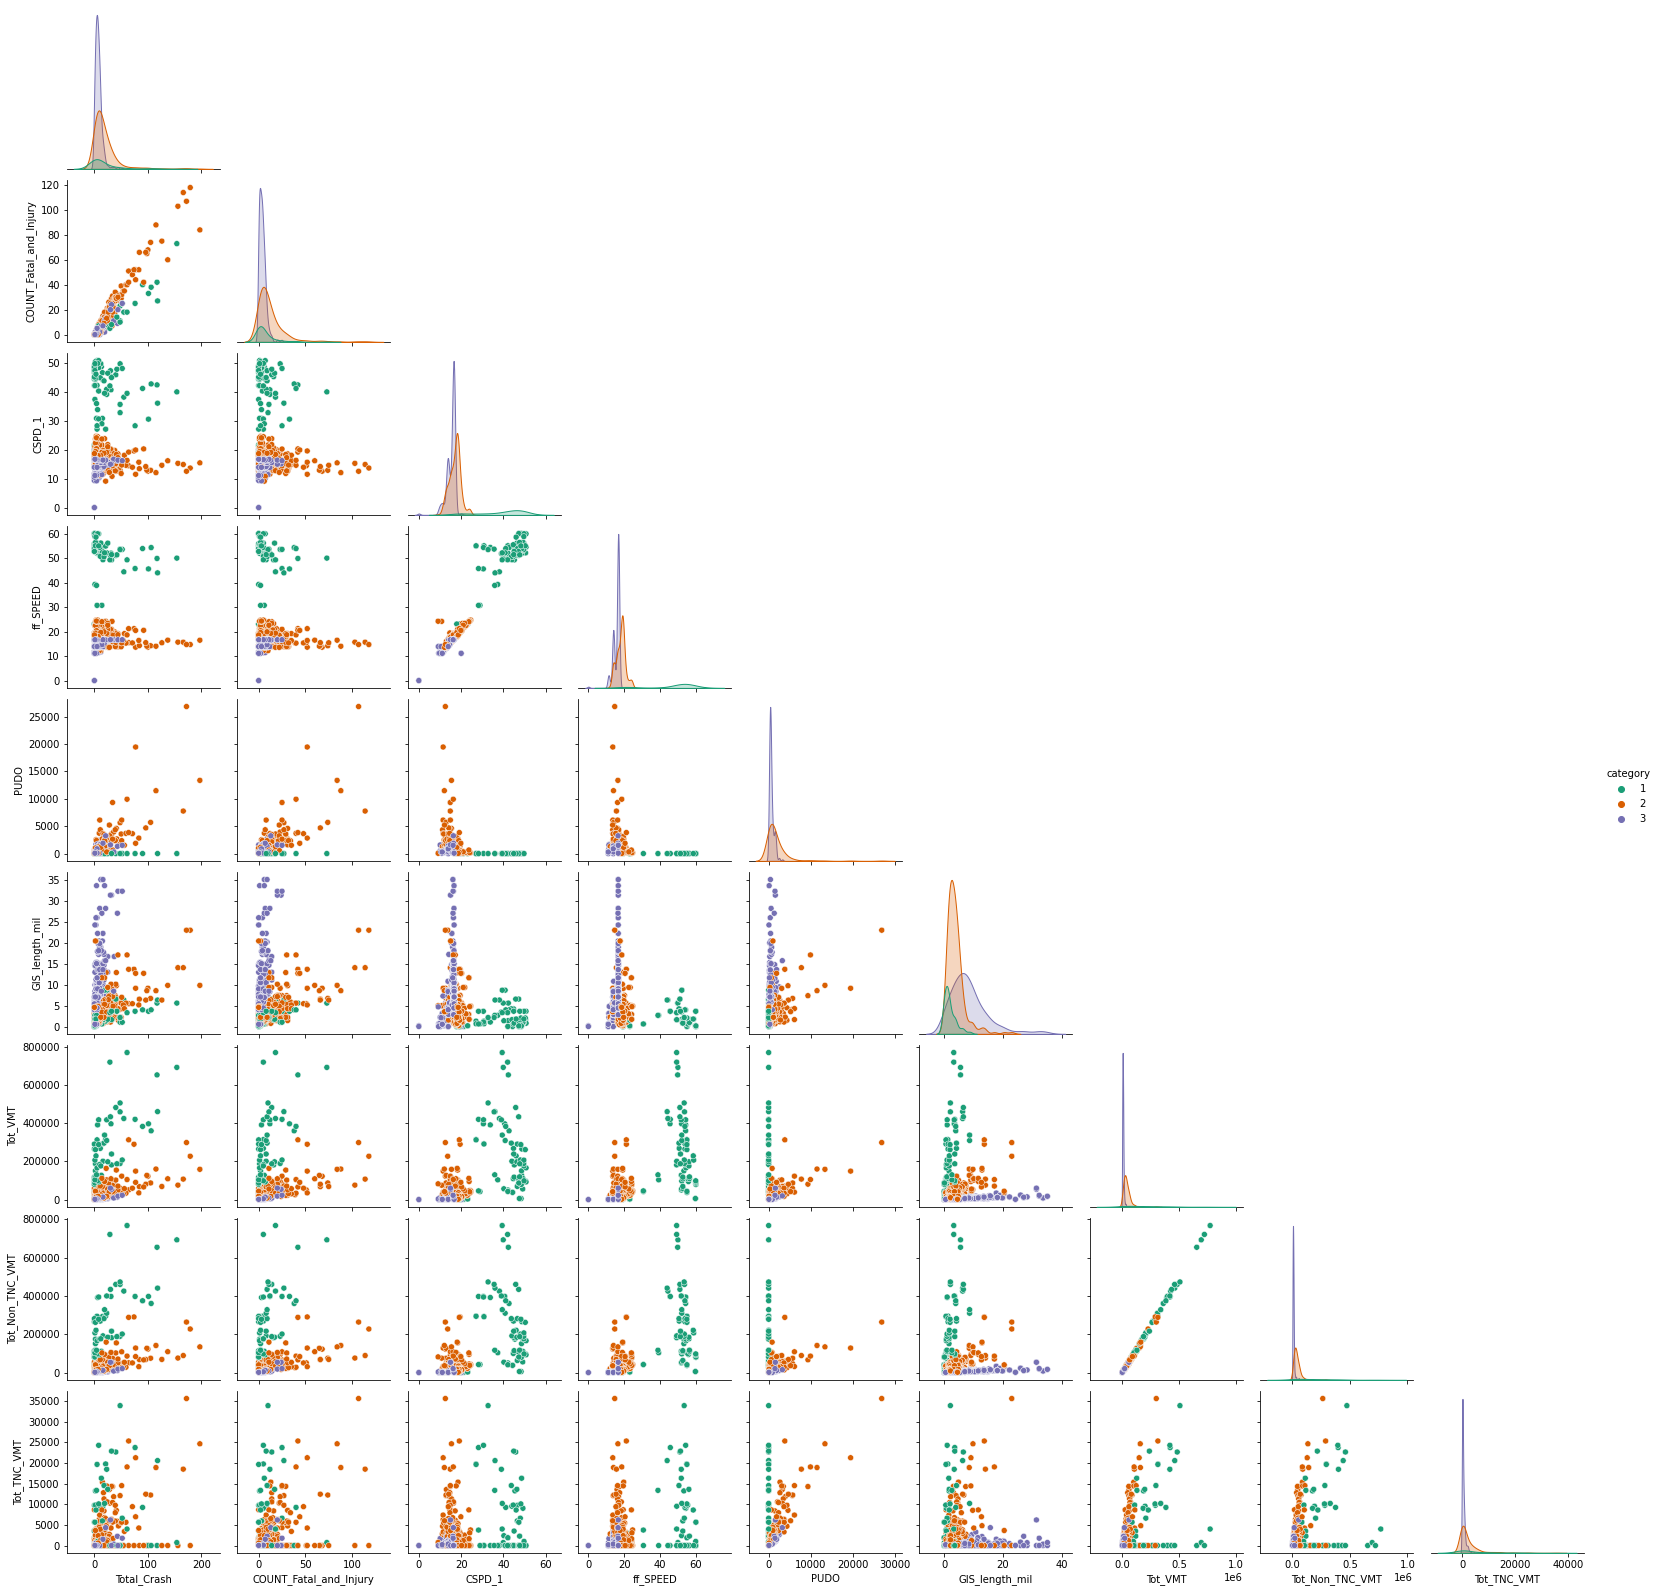

In [78]:
# Base dataframe
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))

Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])

dfmerged_tractce = dfmerged.loc[:, ["Total_Crash","COUNT_Fatal_and_Injury","CSPD_1","ff_SPEED","PUDO","GIS_length_mil","Tot_VMT","Tot_Non_TNC_VMT","Tot_TNC_VMT","category"]]
sns.pairplot(dfmerged_tractce, hue="category", palette='Dark2',corner=True)

# Saving the Seaborn Figure:
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Gen_PairPlots.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [80]:
df2 = dfmerged.loc[dfmerged["Accident_Year"]==2010,"Total_Crash"].describe().loc[['mean', 'std']]
df2.loc['variance'] = df2.loc['std']**2
df2

mean         13.555556
std          20.957893
variance    439.233281
Name: Total_Crash, dtype: float64

In [20]:
df2 = dfmerged.loc[dfmerged["Accident_Year"]==2010,"Total_Crash"].describe().loc[['mean', 'std']]
df2.loc['variance'] = df2.loc['std']**2
df2

mean         13.555556
std          20.957893
variance    439.233281
Name: Total_Crash, dtype: float64

In [81]:
df3 = dfmerged.loc[dfmerged["Accident_Year"]==2016,"Total_Crash"].describe().loc[['mean', 'std']]
df3.loc['variance'] = df3.loc['std']**2
df3

mean         14.820331
std          22.966715
variance    527.470012
Name: Total_Crash, dtype: float64

In [19]:
df3 = dfmerged.loc[dfmerged["Accident_Year"]==2016,"Total_Crash"].describe().loc[['mean', 'std']]
df3.loc['variance'] = df3.loc['std']**2
df3

mean         14.820331
std          22.966715
variance    527.470012
Name: Total_Crash, dtype: float64

In [27]:
# # major fields
# available_fields = ["Tot_VMT", "Total_Crash","COUNT_Fatal_and_Injury",'Pedestrian_Collision_Count','Bicycle_Collision_Count',]
#
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, "SF_diff_pct_change_FT_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.fillna(0,inplace=True)
# gpdMap["FT"] =gpdMap["FT"].astype(int)
#
# ### Input Variable ##########
# input_variable = "Total_Crash"
# #############################
# # [1,2,3,4,5,7,11,12,13,15]
# # Keep only FT types representing real road-network
# # 1: Fwy-Fwy Connector; 2: Freeway; 3: Expressway; 4: Collector; 5: Ramp; 6: Centroid Connector;
# # 7: Major Arterial; 8: ; 9: Alley (only for DTA); 10: ; 11: Local; 12: Minor Arterial; 13: Bike only;
# # 14: ; 15: Super Arterial
# #### FT type ################
# input_FT_type =1
# #############################
# # category types
#
# # _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
# # _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
# # _df.loc[_df[fld].isin([11]),'category']="3"
# # _df.loc[_df[fld].isin([13]),'category']="bike"
# #### Category ################
# # input_category = 1
# #############################
#
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","FT","tractce10"]
# gpdFeatureClass = gpdMap.loc[gpdMap["FT"]==(input_FT_type),col_list]
#
# # diversify color range using styling function
#
# import branca
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"])>0) else 0,
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]>0) else 0,
#                                                   caption ="% difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0,
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute>0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute<0:
#         return linear_color_green(feature_attribute)
#     else:
#         return "#ffffff"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
#         if x["properties"][f"{input_variable}_pct_change"] is not None
#         else "transparent",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_FT_{input_FT_type}_CT_map.html")
# # SFMap.save(str(outfp))
#
# SFMap

In [105]:
# gpdMap.loc[(gpdMap["tractce10"].isin(["011901","012000","012100","012202","012201","012302","012301","012401","012502"])),["Total_Crash_2010","Total_Crash_2016", "FT"]]

In [106]:
# print(gpdMap.columns.to_list())

In [107]:
# 8.4 Map road network attributes, by attribute type, by Facility Type

In [35]:
# # Map road network attributes
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, "SF_diff_pct_change_FT_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.fillna(0,inplace=True)
# dfMap = pd.read_csv(BASE_DIR.parent.joinpath(folder_path, "SF_diff_pct_change_FT_CT_WGS1984.csv"))
# dfMap.fillna(0,inplace=True)
# gpdMap["FT"] =gpdMap["FT"].astype(np.intc)
#
# ##### Input Variable ########
# input_variable = "Tot_VMT"
# #############################
# # [1,2,3,4,5,7,11,12,13,15]
# ##### Facility Type #########
# input_FT_type =15
# #############################
# # category types
# # _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
# # _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
# # _df.loc[_df[fld].isin([11]),'category']="3"
# # _df.loc[_df[fld].isin([13]),'category']="bike"
# ##### Category Type ##########
# input_category = 1
# ##############################
#
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","FT","tractce10"]
# gpdFeatureClass = gpdMap.loc[gpdMap["FT"]==(input_FT_type),col_list]
#
# # diversify color range using styling function
#
# import branca
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"])>0) else 0,
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]>0) else 0,
#                                                   caption ="% difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0,
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute>0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute<0:
#         return linear_color_green(feature_attribute)
#     else:
#         return "#ffffff"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
#         if x["properties"][f"{input_variable}_pct_change"] is not None
#         else "transparent",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_FT_{input_FT_type}_CT_map.html")
# SFMap.save(str(outfp))
#
# SFMap

In [28]:
# # aggregate by category and display map
# def label_df_by_road_category(_df,fld):
#     _df["category"]=0
#     _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
#     _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
#     _df.loc[_df[fld].isin([11]),'category']="3"
#     _df.loc[_df[fld].isin([13]),'category']="bike"
#     return _df
# dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_FT_CT.csv"))
# # Lets get some maps
# keep_cols = ['Tot_VMT','Tot_CAP', 'OOS','Tot_Vol','cspd_time_rev','GIS_length_mil','TIME_1','CSPD_1','SPEED',
#              'COUNT_BICYCLIST_KILLED', 'COUNT_PED_KILLED', 'Truck_Collision_Count', 'COUNT_PED_INJURED', 'COUNT_VISIBLE_INJ', 'COUNT_MC_INJURED',  'COUNT_Other_Injury', 'Pedestrian_Collision_Count', 'DISTANCE','COUNT_PDO',  'COUNT_BICYCLIST_INJURED', 'Total_Crash',  'MC_Collision_Count', 'COUNT_Fatal', 'COUNT_SEVERE_INJ',  'Bicycle_Collision_Count', 'COUNT_COMPLAINT_PAIN', 'PUDO', 'cycleinfra_length', 'COUNT_Visible_Injury', 'COUNT_MC_KILLED', 'NUMBER_INJURED', 'COUNT_Severe_Injury', 'NUMBER_KILLED','tractce10', 'FT', 'Accident_Year', 'category_x','tractce10_FT', ]
# dfMap = dfmerged[keep_cols].copy()
# Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
# dfMap["COUNT_Fatal_and_Injury"] = dfMap[Count_Fat_Inj].sum(axis=1)
# dfMap.drop(columns=["category_x","tractce10","FT",],inplace=True)
#
# dfMap[["tractce10","FT"]] = dfMap["tractce10_FT"].str.split("_",expand=True)
# dfMap["tractce10"]=dfMap["tractce10"].astype(str)
# dfMap["FT"]=dfMap["FT"].astype(int)
#
# dfMap = label_df_by_road_category(dfMap.copy(),"FT")
# dfMap["FT"] = dfMap["FT"].astype(str)
# dfMap.loc[:, "tractce10_category"] = dfMap["tractce10"].astype(str) + "_" +dfMap["category"].astype(str)
#
# def agg_network_by_category(_df,uniqueID):
#     _df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     _df.fillna(0, inplace=True)
#     _df["FT"] = _df["FT"].astype(str)
#     _df[uniqueID] = _df[uniqueID].astype(str)
#     _df["tractce10"] = _df["tractce10"].astype(str)
#     _df["category"] = _df["category"].astype(str)
#     _df["Accident_Year"] = _df["Accident_Year"].astype(str)
#     # aggregate the dataframe using A_B
#     wt_avg = lambda x: np.ma.average(x, weights = _df.loc[x.index, "Tot_VMT"])
#     # Aggregating rows based on one column with “, ”.join
#     concat_agg = lambda ar: ', '.join([item for item in ar if item])
#     def agg_func_rdntwrk(df):
#         d = {}
#         for col in df.select_dtypes(np.number).columns:
#             if col in wt_col:
#                 d[col] = wt_avg
#             else:
#                 d[col] = "sum"
#         for col in df.select_dtypes(object).columns:
#             if col in str_col:
#                 d[col] = "first"
#             elif col=="FT":
#                 d[col] = concat_agg
#         return d
#
#     wt_col = ["SPEED","TIME","TIME_1","CSPD_1",]
#     str_col = ['tractce10',"category","Accident_Year"]
#     df = _df.groupby([uniqueID],as_index=False).aggregate(agg_func_rdntwrk(_df.copy())).copy()
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     df.fillna(0, inplace=True)
#     df.drop(columns=["FT","tractce10","category"],inplace=True)
#     df["Accident_Year"] = df["Accident_Year"].astype(int)
#     return df
#
# dfMap2010 = agg_network_by_category(dfMap.loc[dfMap["Accident_Year"]==2010].copy(),"tractce10_category")
# dfMap2016 = agg_network_by_category(dfMap.loc[dfMap["Accident_Year"]==2016].copy(),"tractce10_category")
#
# dfMapJoined = pd.merge(dfMap2010.add_suffix("_2010").copy(),dfMap2016.add_suffix("_2016").copy(), left_on="tractce10_category_2010",right_on="tractce10_category_2016",how="inner")
# dfMapJoined.rename(columns={"tractce10_category_2010":"tractce10_category"},inplace=True)
# dfMapJoined.drop(columns="tractce10_category_2016",inplace=True)
# dfMapJoined[["tractce10","category"]] = dfMapJoined["tractce10_category"].str.split("_",expand=True)
#
# # dfJoined.rename(columns={"tractce10_2010":"tractce"},inplace=True)
# def add_column(df):
#     cols = ['COUNT_BICYCLIST_KILLED', 'COUNT_PED_KILLED','Tot_VMT', 'Truck_Collision_Count', 'Tot_CAP', 'OOS','COUNT_PED_INJURED', 'Tot_Vol','COUNT_VISIBLE_INJ', 'COUNT_MC_INJURED', 'COUNT_Other_Injury', 'Pedestrian_Collision_Count','COUNT_PDO', 'COUNT_BICYCLIST_INJURED', 'Total_Crash','MC_Collision_Count', 'COUNT_Fatal',  'COUNT_SEVERE_INJ',  'Bicycle_Collision_Count', 'COUNT_COMPLAINT_PAIN', 'PUDO', 'cycleinfra_length', 'COUNT_Visible_Injury', 'COUNT_MC_KILLED', 'NUMBER_INJURED', 'COUNT_Severe_Injury','GIS_length_mil', 'NUMBER_KILLED',"COUNT_Fatal_and_Injury","CSPD_1","SPEED"]
#     d = {}
#     for col in cols:
#         d[f'{col}_{"diff"}'] = df[f'{col}_{"2016"}'] - df[f'{col}_{"2010"}']
#         d[f'{col}_{"pct_change"}'] = d[f'{col}_{"diff"}'].divide(df[f'{col}_{"2010"}'])*100
#     return pd.concat([df, pd.DataFrame(d, index=df.index)],axis=1)
#
# dfMapJoined = add_column(dfMapJoined.copy())
# dfMapJoined = dfMapJoined.sort_index(axis=1).sort_values(by=["tractce10","category"])
# for i in (dfMapJoined["category"].unique()):
#     dfCategory = dfMapJoined.loc[dfMapJoined["category"]==str(i)].copy()
#     dfCategory.drop(columns=["tractce10","category"],inplace=True)
#     # dfCategory.rename(columns={"uniqueID":"tractce10_category"},inplace=True)
#     # dfCategory["tractce10"] = dfCategory["tractce10"].astype(str)
#     # dfCategory["category"] = dfCategory["category"].astype(str)
#     dfCategory.to_csv(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{str(i)}_CT.csv"))

In [29]:
# for i in [1,2,3,"bike"]:
#     input_category = str(i)
#     dfJoined = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,f"SF_diff_pct_change_cat_{str(input_category)}_CT.csv"))
#     dfJoined.replace([np.inf, -np.inf], np.nan, inplace=True)
#     dfJoined.fillna(0, inplace=True)
#     dfJoined[["tractce10","category"]] = dfJoined["tractce10_category"].str.split("_",expand=True)
#     dfJoined["tractce10"] = dfJoined["tractce10"].astype(str)
#     dfJoined["category"] = dfJoined["category"].astype(str)
#     # get CT map
#     gpdSFCT = gpd.read_file(BASE_DIR.parent.joinpath(folder_path,"SF_CensusTract_PCS.geojson"))
#     gpdSFCT = gpdSFCT.to_crs(3857)
#     gpdSFCT = gpdSFCT.to_crs(4326)
#     gpdSFCT = gpdSFCT[["tractce10","geometry"]]
#
#     # merge the geodataframe with dataframe
#     gpdSFCT = gpdSFCT.merge(dfJoined,left_on="tractce10",right_on="tractce10",how="left")
#     gpdSFCT.drop(columns=["Unnamed: 0"],inplace=True)
#     gpdSFCT.replace([np.inf, -np.inf], np.nan, inplace=True)
#     gpdSFCT.loc[:,"Accident_Year_2010"] = 2010
#     gpdSFCT.loc[:,"Accident_Year_2016"] = 2016
#     gpdSFCT.loc[:,"category"] = input_category
#     gpdSFCT.loc[:,"tractce10_category"] =  gpdSFCT["tractce10"] + "_" +gpdSFCT["category"]
#     gpdSFCT.fillna(0, inplace=True) # SF_diff_pct_change_FT_CT_WGS1984
#     gpdSFCT.to_file(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{input_category}_CT_WGS1984.geojson"),crs="EPSG:4326")
#     gpdSFCT.loc[:,~gpdSFCT.columns.isin(["geometry"])].to_csv(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{input_category}_CT_WGS1984.csv"))

In [30]:
# input_category = "3"
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{input_category}_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.replace([np.inf, -np.inf], np.nan, inplace=True)
# gpdMap.fillna(0,inplace=True)
# gpdMap["category"] =gpdMap["category"].astype(int)
#
# ##### Input Variable ##########
# input_variable = "COUNT_Fatal_and_Injury"
# # #############################
# # # [1,2,3,4,5,7,11,12,13,15]
# # # category types
# # # _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
# # # _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
# # # _df.loc[_df[fld].isin([11]),'category']="3"
# # # _df.loc[_df[fld].isin([13]),'category']="bike"
# #
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","tractce10",]
# #
# gpdFeatureClass = gpdMap.loc[:,col_list]
# #
# # diversify color range using styling function
#
# import branca
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]),
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]), caption ="% difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]),
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute>0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute<0:
#         return linear_color_green(feature_attribute)
#     else:
#         return "#ffffff"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
#         if x["properties"][f"{input_variable}_pct_change"] is not None
#         else "transparent",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_cat_{input_category}_CT_map.html")
# SFMap.save(str(outfp))
#
# SFMap

In [34]:
# input_category = "3"
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{input_category}_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.replace([np.inf, -np.inf], np.nan, inplace=True)
# gpdMap.fillna(0,inplace=True)
# gpdMap["category"] =gpdMap["category"].astype(int)
#
# ##### Input Variable ##########
# input_variable = "Tot_VMT"
# # #############################
# # # [1,2,3,4,5,7,11,12,13,15]
# # # category types
# # # _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
# # # _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
# # # _df.loc[_df[fld].isin([11]),'category']="3"
# # # _df.loc[_df[fld].isin([13]),'category']="bike"
# #
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","tractce10",]
# #
# gpdFeatureClass = gpdMap.loc[:,col_list]
# #
# # diversify color range using styling function
#
# import branca
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"])>0) else 0,
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]) if any(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]>0,f"{input_variable}_pct_change"]>0) else 0,
#                                                   caption ="% difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0,
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_pct_change"]<0,f"{input_variable}_pct_change"])<0) else 0).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute>0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute<0:
#         return linear_color_green(feature_attribute)
#     else:
#         return "#ffffff"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change" ],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)", "% Change"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_pct_change"])
#         if x["properties"][f"{input_variable}_pct_change"] is not None
#         else "transparent",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_cat_{input_category}_CT_map.html")
# SFMap.save(str(outfp))
#
# SFMap

In [113]:
# 9.4 Road attributes (PUDO) - by category type absolute values

In [31]:
# input_category = "3"
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, f"SF_diff_pct_change_cat_{input_category}_CT_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.replace([np.inf, -np.inf], np.nan, inplace=True)
# gpdMap.fillna(0,inplace=True)
# gpdMap["category"] =gpdMap["category"].astype(int)
#
# ##### Input Variable ##########
# input_variable = "PUDO"
# # #############################
# # # [1,2,3,4,5,7,11,12,13,15]
# # # category types
# # # _df.loc[_df[fld].isin([1, 2, 3, 5]),'category']="1"
# # # _df.loc[_df[fld].isin([4,7,12,15]),'category']="2"
# # # _df.loc[_df[fld].isin([11]),'category']="3"
# # # _df.loc[_df[fld].isin([13]),'category']="bike"
# #
# col_list = [f"{input_variable}_2010",f"{input_variable}_2016",f"{input_variable}_diff",f"{input_variable}_pct_change","geometry","tractce10",]
# #
# gpdFeatureClass = gpdMap.loc[:,col_list]
# #
# # diversify color range using styling function
#
# import branca
#
# linear_color_red = branca.colormap.LinearColormap(["#ffb2b2","#ff7f7f","#ff4c4c","#ff1919"],
#                                                   vmin= np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]<0,f"{input_variable}_diff"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]<0,f"{input_variable}_diff"])<0) else 0,
#                                                   vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]<0,f"{input_variable}_diff"]) if any((gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]<0,f"{input_variable}_diff"])<0) else 0,
#                                                   caption ="absolute difference").to_step(10)
#
# linear_color_green = branca.colormap.LinearColormap(["#008000","#329932","#66b266","#99cc99"],
#                                                     vmin=np.nanmin(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]>0,f"{input_variable}_diff"]),
#                                                     vmax=np.nanmax(gpdFeatureClass.loc[gpdFeatureClass[f"{input_variable}_diff"]>0,f"{input_variable}_diff"])).to_step(10)
#
# def get_linear_color(feature_attribute):
#     if feature_attribute<0:
#         return linear_color_red(feature_attribute)
#     elif feature_attribute>0:
#         return linear_color_green(feature_attribute)
#     else:
#         return "#ffffff"
#
# import folium
# from folium.features import GeoJsonPopup, GeoJsonTooltip
# SFMap = folium.Map(location=[37.76002622191773, -122.44313142442648], zoom_start=11)
#
#
# popup = GeoJsonPopup(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff"],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )
#
# tooltip = GeoJsonTooltip(
#     fields=["tractce10", f"{input_variable}_2010", f"{input_variable}_2016",f"{input_variable}_diff"],
#     aliases=["CensusTract", "YR2010" ,"YR2016", "Diff (YR2016-YR2010)"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#                 box-shadow: 3px;
#     """,
#     max_width=800,
# )
#
# g = folium.GeoJson(
#     gpdFeatureClass,
#     style_function=lambda x: {
#         "fillColor": get_linear_color(x["properties"][f"{input_variable}_diff"])
#         if x["properties"][f"{input_variable}_diff"] is not None
#         else "transparent",
#         "color": "black",
#         "fillOpacity": 0.85,
#     },
#     tooltip=tooltip,
#     popup=popup,
# ).add_to(SFMap)
#
# folium.LayerControl().add_to(SFMap)
#
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"SF_{input_variable}_cat_{input_category}_CT_map.html")
# # SFMap.save(str(outfp))
#
# SFMap

In [33]:
# gpdMap= gpd.read_file(BASE_DIR.parent.joinpath(folder_path, "SF_CensusTract_diff_pct_change_WGS1984.geojson"),crs="EPSG:4326")
# gpdMap.fillna(0,inplace=True)
# gpdMap.drop(columns=["FT","category_2010","category_2016","tractce10"],inplace=True)
# gpdMap[["tractce10","FT"]] = gpdMap["tractce10_FT"].str.split("_",expand=True)
# gpdMap["tractce10"]=gpdMap["tractce10"].astype(str)
# gpdMap["FT"]=gpdMap["FT"].astype(int)
# gpdMap = label_df_by_road_category(gpdMap.copy(),"FT")
# aggregate the columns by tractce10, category type


DriverError: D:\OneDrive - University of Kentucky\YR_2\Overpass_Turbo\Exported_Files\census_tract\agg_network\Mar042022\CensusTract_FT_FullNetwork\SF_CensusTract_diff_pct_change_WGS1984.geojson: No such file or directory

In [ ]:
# create additional custom fields

def get_req_fields(_df):
    fields = ["Tot_VMT","Tot_TNC_VMT","Tot_Non_TNC_VMT", "PUDO","OOS"]
    d = {}
    for fld in fields:
        if fld == "Tot_VMT":
            d[f"{fld}_mil"] = _df[fld].divide(1000000)
            d[f"{fld}_yr"] = _df[fld]*365
            d[f"{fld}_mil_yr"] =  d[f"{fld}_yr"].divide(1000000)
            d[f"log_{fld}"] = np.log(_df[fld]+1)
            d[f"log_{fld}_mil"] = np.log(d[f"{fld}_mil"]+1)
            d[f"log_{fld}_mil_yr"] = np.log(d[f"{fld}_mil_yr"]+1)
        elif fld == "Tot_TNC_VMT":
            cols = ['V13_1',"OOS"]
            d[fld] = (_df[cols].sum(axis=1))*_df["GIS_length_mil"]
            d[f"{fld}_mil"] = d[fld].divide(1000000)
            d[f"{fld}_yr"] = d[fld]*365
            d[f"{fld}_mil_yr"] =  d[f"{fld}_yr"].divide(1000000)
            d[f"log_{fld}"] = np.log(d[fld]+1)
            d[f"log_{fld}_mil"] = np.log(d[f"{fld}_mil"]+1)
            d[f"log_{fld}_mil_yr"] = np.log(d[f"{fld}_mil_yr"]+1)
        elif fld == "Tot_Non_TNC_VMT":
            cols = ['V13_1',"OOS"]
            d[fld] = (_df["Tot_Vol"] - _df[cols].sum(axis=1))*_df["GIS_length_mil"]
            d[f"{fld}_mil"] = d[fld].divide(1000000)
            d[f"{fld}_yr"] = d[fld]*365
            d[f"{fld}_mil_yr"] =  d[f"{fld}_yr"].divide(1000000)
            d[f"log_{fld}"] = np.log(d[fld]+1)
            d[f"log_{fld}_mil"] = np.log(d[f"{fld}_mil"]+1)
            d[f"log_{fld}_mil_yr"] = np.log(d[f"{fld}_mil_yr"]+1)
        elif fld == "PUDO":
            d["PUDO_yr"] = (_df["PUDO"]*365)
            d["PUDO_thousands"] = _df["PUDO"].divide(1000)
            d["PUDO_thousands_yr"] = d["PUDO_thousands"]*365
            d["PUDO_mil"] = _df["PUDO"].divide(1000000)
            d["PUDO_mil_yr"] = d["PUDO_yr"].divide(1000000)

            d["log_PUDO"] = np.log(_df["PUDO"]+1)
            d["log_PUDO_yr"] = np.log(d["PUDO_yr"]+1)
            d["log_PUDO_thousands"] = np.log(d["PUDO_thousands"]+1)
            d["log_PUDO_thousands_yr"] = np.log(d["PUDO_thousands_yr"]+1)
            d["log_PUDO_mil"] = np.log(d["PUDO_mil"]+1)
            d["log_PUDO_mil_yr"] = np.log(d["PUDO_mil_yr"]+1)
        elif fld == "OOS":
            d["OOS_yr"] = (_df["OOS"]*365)
            d["OOS_thousands"] = _df["OOS"].divide(1000)
            d["OOS_thousands_yr"] = d["OOS_thousands"]*365
            d["OOS_mil"] = _df["OOS"].divide(1000000)
            d["OOS_mil_yr"] = d["OOS_yr"].divide(1000000)

            d["log_OOS"] = np.log(_df["OOS"]+1)
            d["log_OOS_yr"] = np.log(d["OOS_yr"]+1)
            d["log_OOS_thousands"] = np.log(d["OOS_thousands"]+1)
            d["log_OOS_thousands_yr"] = np.log(d["OOS_thousands_yr"]+1)
            d["log_OOS_mil"] = np.log(d["OOS_mil"]+1)
            d["log_OOS_mil_yr"] = np.log(d["OOS_mil_yr"]+1)
    return pd.concat([_df, pd.DataFrame(d, index=_df.index)],axis=1)
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
dfmerged_mod = get_req_fields(dfmerged.copy())
dfmerged_mod.sort_index(axis=1).sort_values(by=["tractce10_category","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_CAT_CT_mod.csv"))

In [ ]:
dfmerged["Tot_VMT"]

In [ ]:
# dfmerged.loc[dfmerged["Accident_Year"]==2016]["Total_Crash"].sum()

In [ ]:
# 10.Pair Plot Charts for FT datatype

In [2]:
# Base dataframe
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path, "SF_merged_FT_CT.csv"))
Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
# dfmerged["new_SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
# Split the dataframe YR 2010 and YR 2016
df2010 = dfmerged.loc[dfmerged["Accident_Year"]==2010].copy()
df2010.loc[:,"SPD_ratio"] = df2010["CSPD_1"].divide(df2010["ff_SPEED"])
df2010.sort_index(axis=1).sort_values(by=["tractce10","FT","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_2010_FT_CT.csv"))
df2016 = dfmerged.loc[dfmerged["Accident_Year"]==2016].copy()
df2016.loc[:,"SPD_ratio"] = df2016["CSPD_1"].divide(df2016["ff_SPEED"])
df2016.sort_index(axis=1).sort_values(by=["tractce10","FT","Accident_Year"]).to_csv(BASE_DIR.parent.joinpath(folder_path,"SF_2016_FT_CT.csv"))

In [17]:
dfmerged[["ff_SPEED","SPEED"]]

,ff_SPEED,SPEED
0,13.888889,25.0
1,13.888889,25.0
2,13.888889,25.0
3,13.888889,25.0
4,19.444286,35.0
...,...,...
1700,16.666667,30.0
1701,23.076923,30.0
1702,23.076923,30.0
1703,19.444285,35.0


In [ ]:
# print(dfmerged.columns.to_list())

In [ ]:
# print(dfmerged.FT.unique())

In [ ]:
#     Keep only FT types representing real road-network
#     1: Fwy-Fwy Connector; 2: Freeway; 3: Expressway; 4: Collector; 5: Ramp; 6: Centroid Connector;
#     7: Major Arterial; 8: ; 9: Alley (only for DTA); 10: ; 11: Local; 12: Minor Arterial; 13: Bike only;
#     14: ; 15: Super Arterial

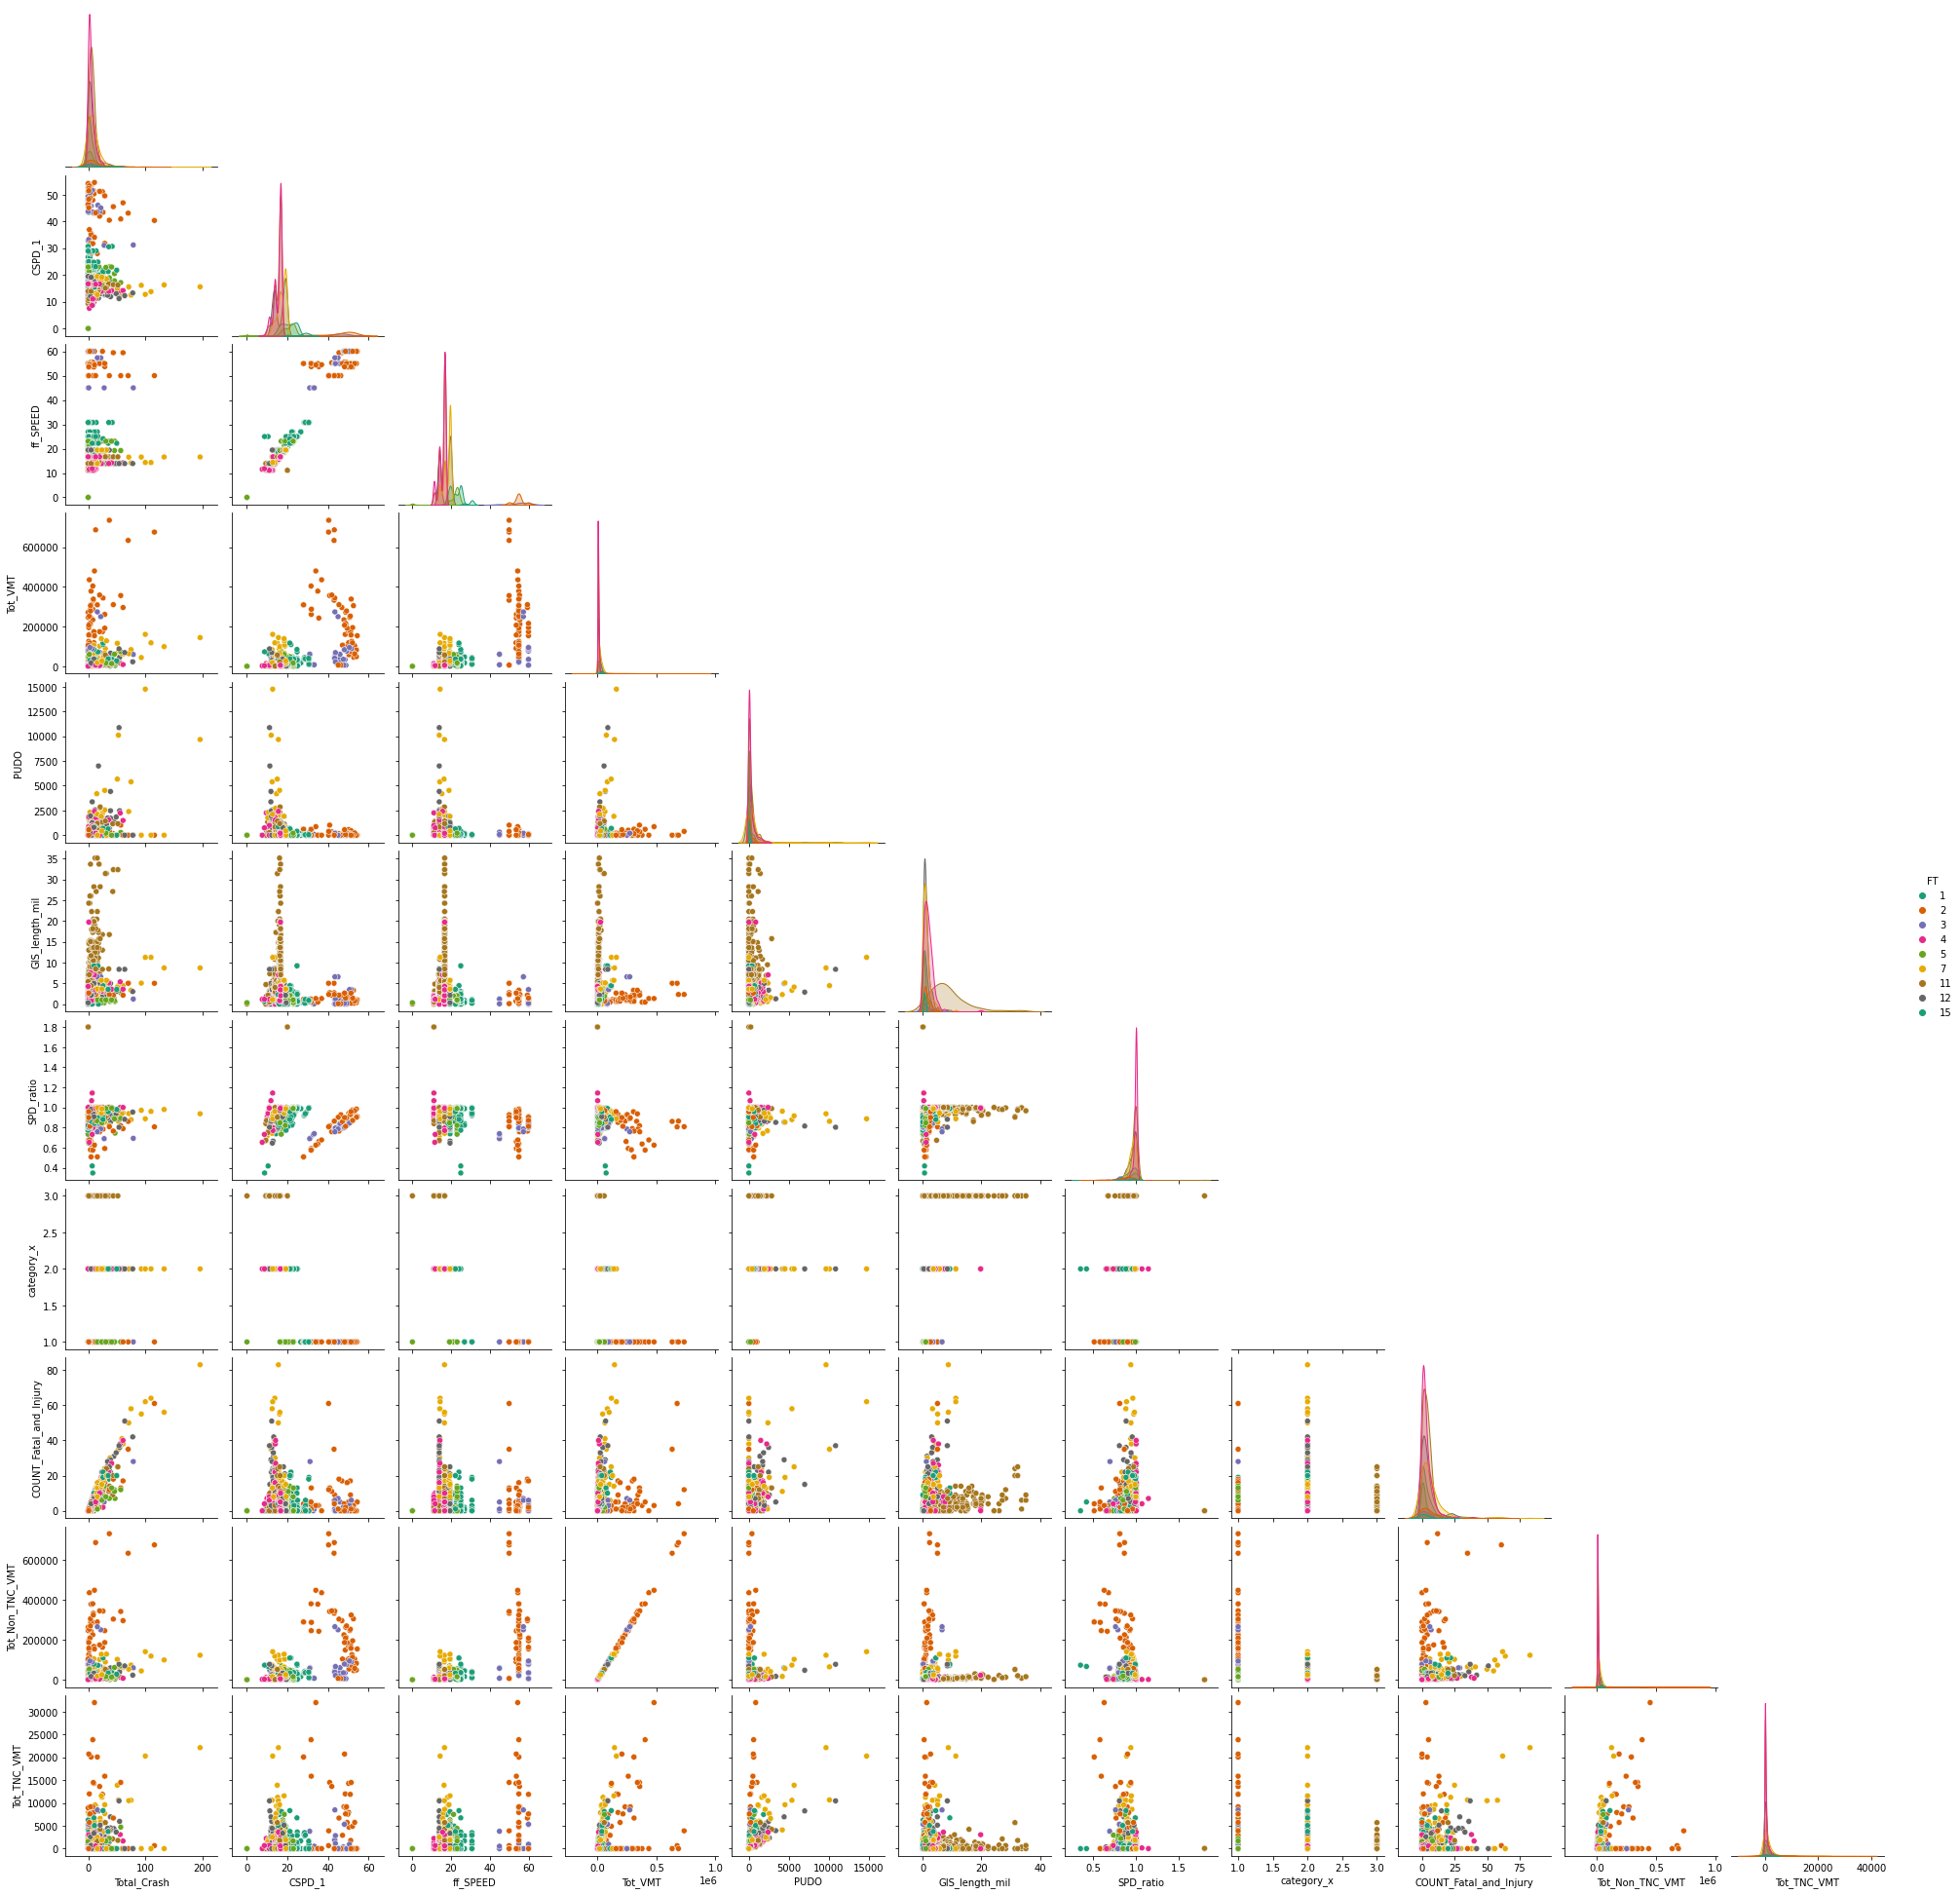

In [3]:
# df2010_tractce = df2010.loc[df2010["tractce10"]=="018000", ["Total_Crash","CSPD_1","SPEED","Tot_VMT","PUDO","category_x","GIS_length_mil"]]
dfmerged_tractce = dfmerged.loc[:, ["Total_Crash","CSPD_1","ff_SPEED","Tot_VMT","PUDO","GIS_length_mil","SPD_ratio","FT","category_x","COUNT_Fatal_and_Injury","Tot_Non_TNC_VMT","Tot_TNC_VMT"]]
# df2010_tractce["FT"] =df2010_tractce["FT"].astype("int")
# sns.pairplot(df2010_tractce, hue="FT", corner=True,hue_order=df2010_tractce["FT"].sort_values().unique())
sns.pairplot(dfmerged_tractce, hue="FT", corner=True,palette='Dark2')
# Saving the Seaborn Figure:
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Gen_PairPlots.png")
# Saving the Seaborn Figure:
# plt.savefig(outfp,dpi=300)

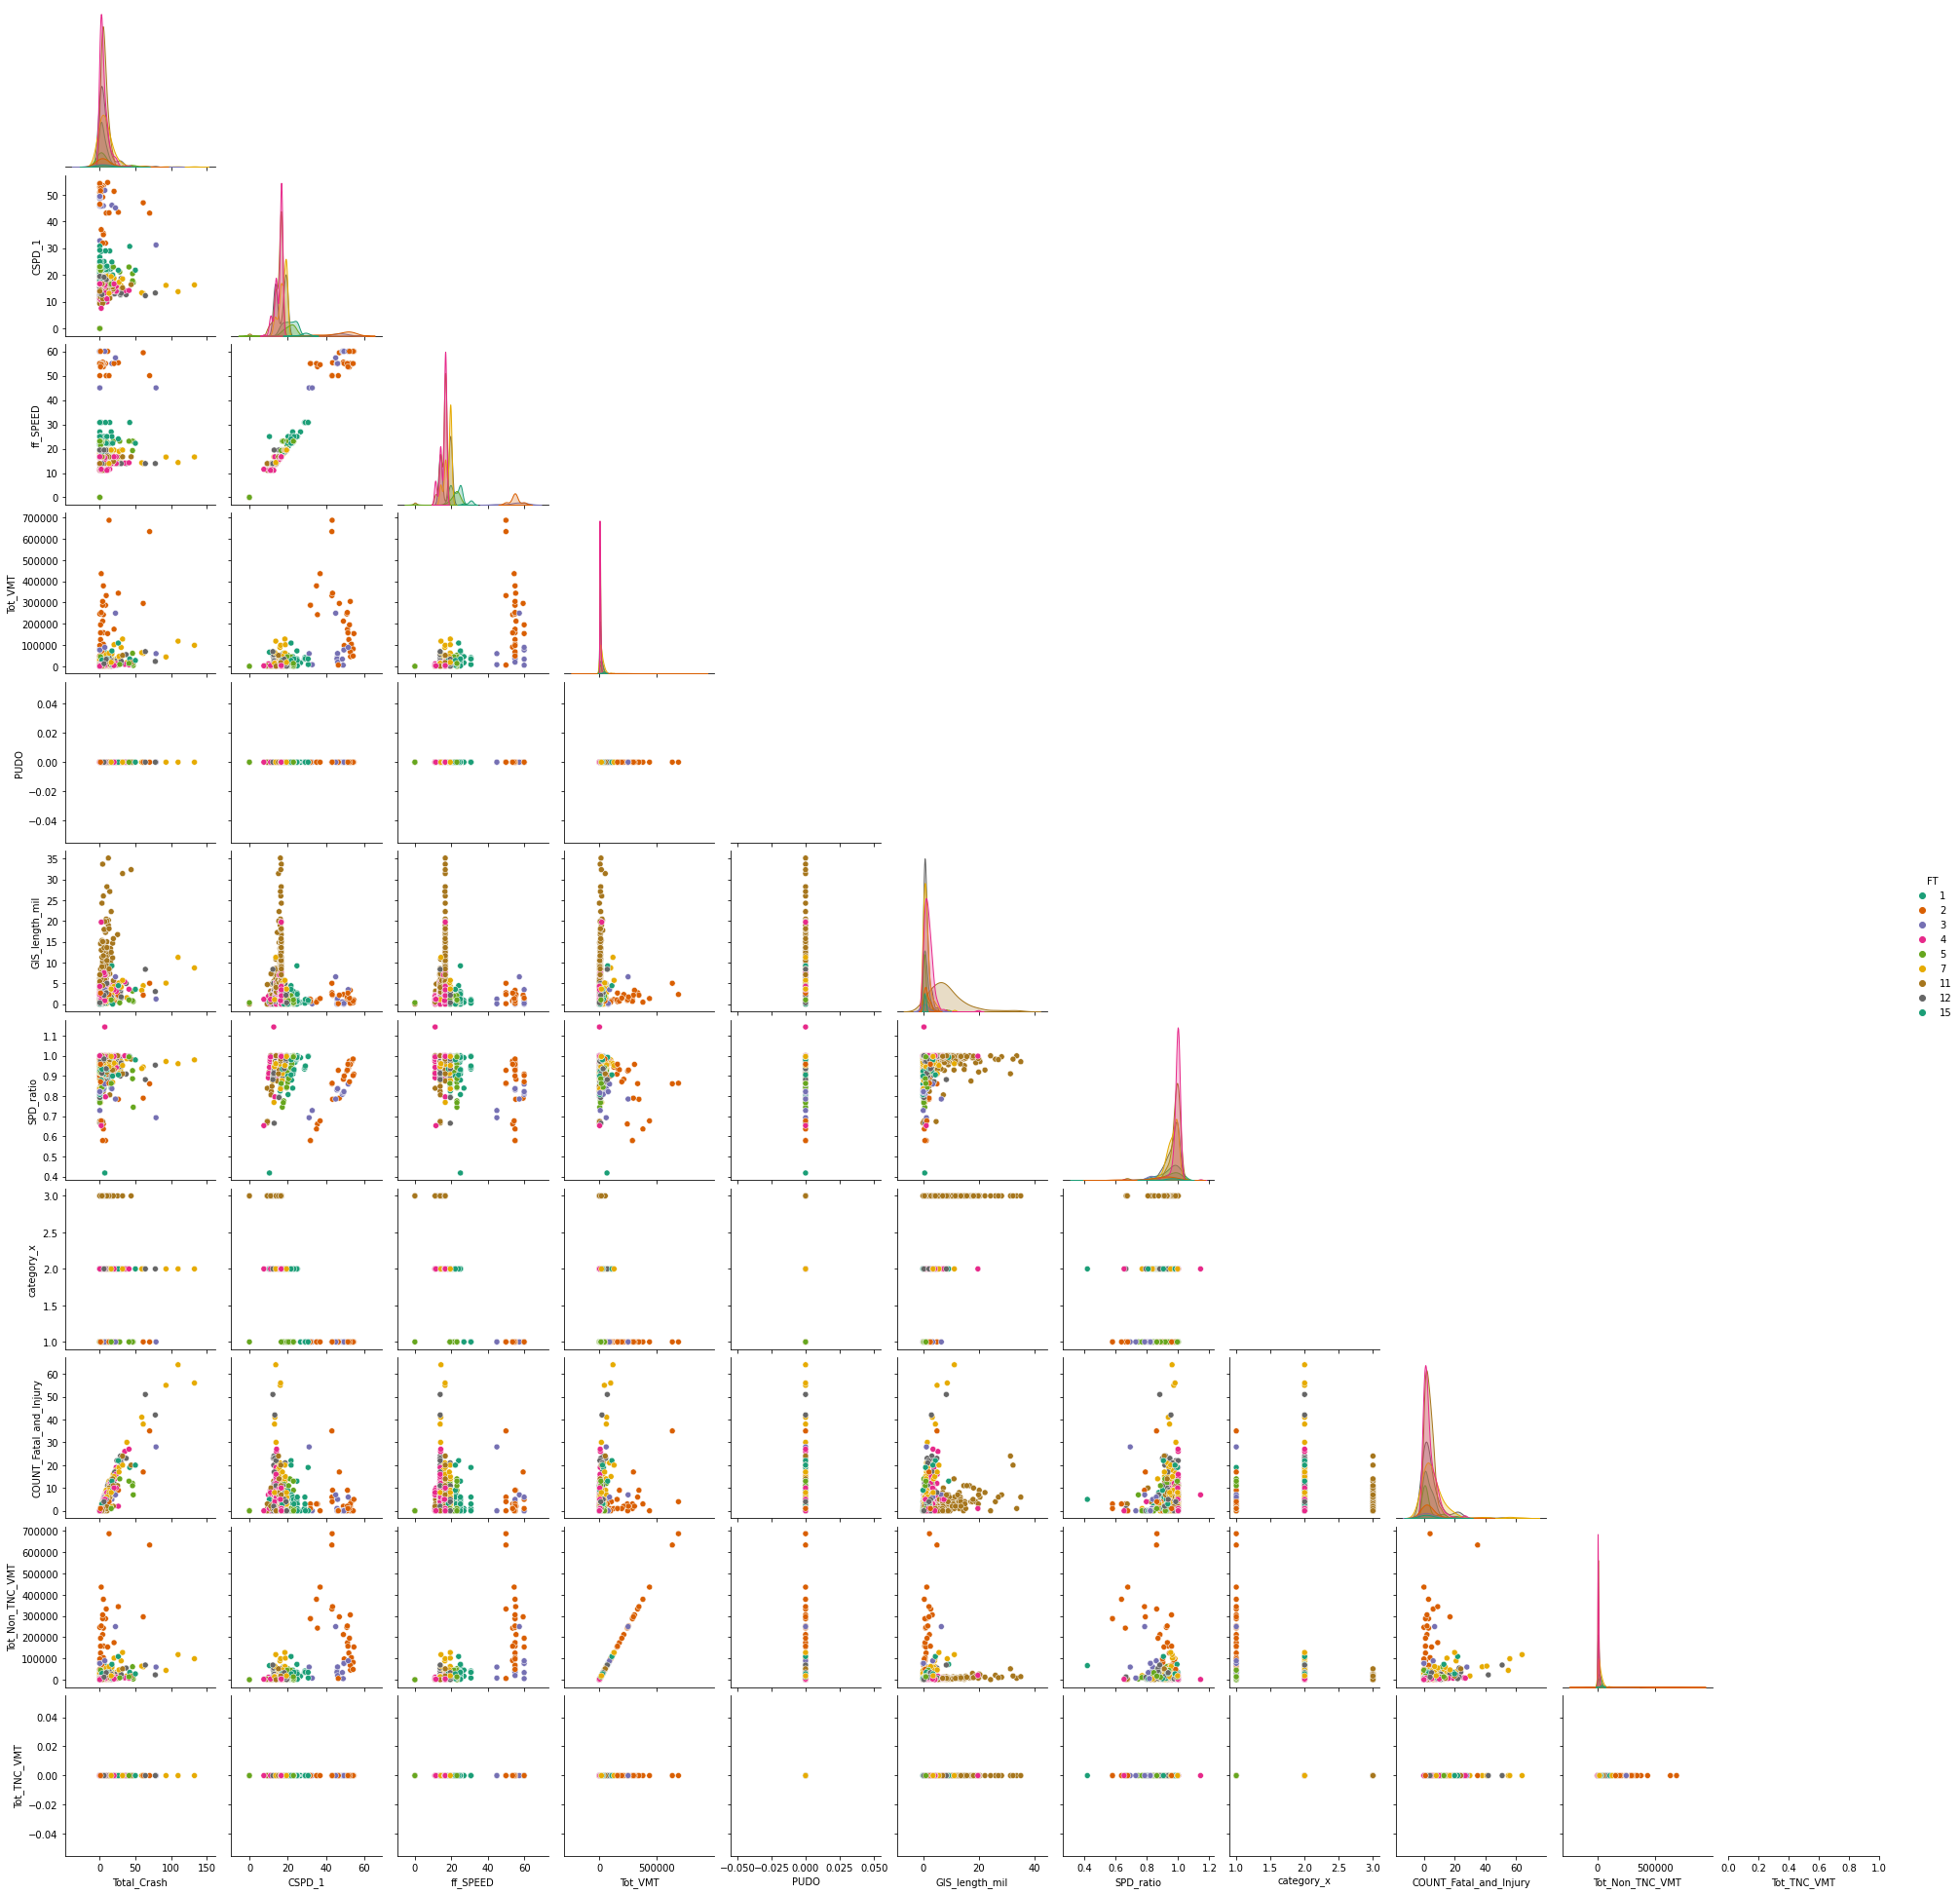

In [4]:
# df2010_tractce = df2010.loc[df2010["tractce10"]=="018000", ["Total_Crash","CSPD_1","SPEED","Tot_VMT","PUDO","category_x","GIS_length_mil"]]
df2010_tractce = df2010.loc[:, ["Total_Crash","CSPD_1","ff_SPEED","Tot_VMT","PUDO","GIS_length_mil","SPD_ratio","FT","category_x","COUNT_Fatal_and_Injury","Tot_Non_TNC_VMT","Tot_TNC_VMT"]]
# df2010_tractce["FT"] =df2010_tractce["FT"].astype("int")
# sns.pairplot(df2010_tractce, hue="FT", corner=True,hue_order=df2010_tractce["FT"].sort_values().unique())
sns.pairplot(df2010_tractce, hue="FT", corner=True,palette='Dark2')
# Saving the Seaborn Figure:
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"YR2010_PairPlots.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [6]:
df2010.loc[df2010["Tot_Non_TNC_VMT"]>500000]

,Unnamed: 0,Accident_Year,BUSVOL_AM,BUSVOL_EA,BUSVOL_EV,BUSVOL_MD,BUSVOL_PM,Bicycle_Collision_Count,CAP,COUNT_BICYCLIST_INJURED,...,category_x,category_y,cspd_time,cycleinfra_length,ff_SPEED,ff_TIME,tractce10,tractce10_FT,COUNT_Fatal_and_Injury,SPD_ratio
522,261,2010,5536.9,165.0,5941.50,2590.30,4739.0,0.0,64750,0.0,...,1,1,6.979980,0.0,50.0,6.015380,17902,017902_2,35.0,0.861225
1586,793,2010,4699.2,240.0,5928.75,2587.05,4656.0,0.0,92500,0.0,...,1,1,3.168879,0.0,50.0,2.771587,61500,061500_2,4.0,0.863736


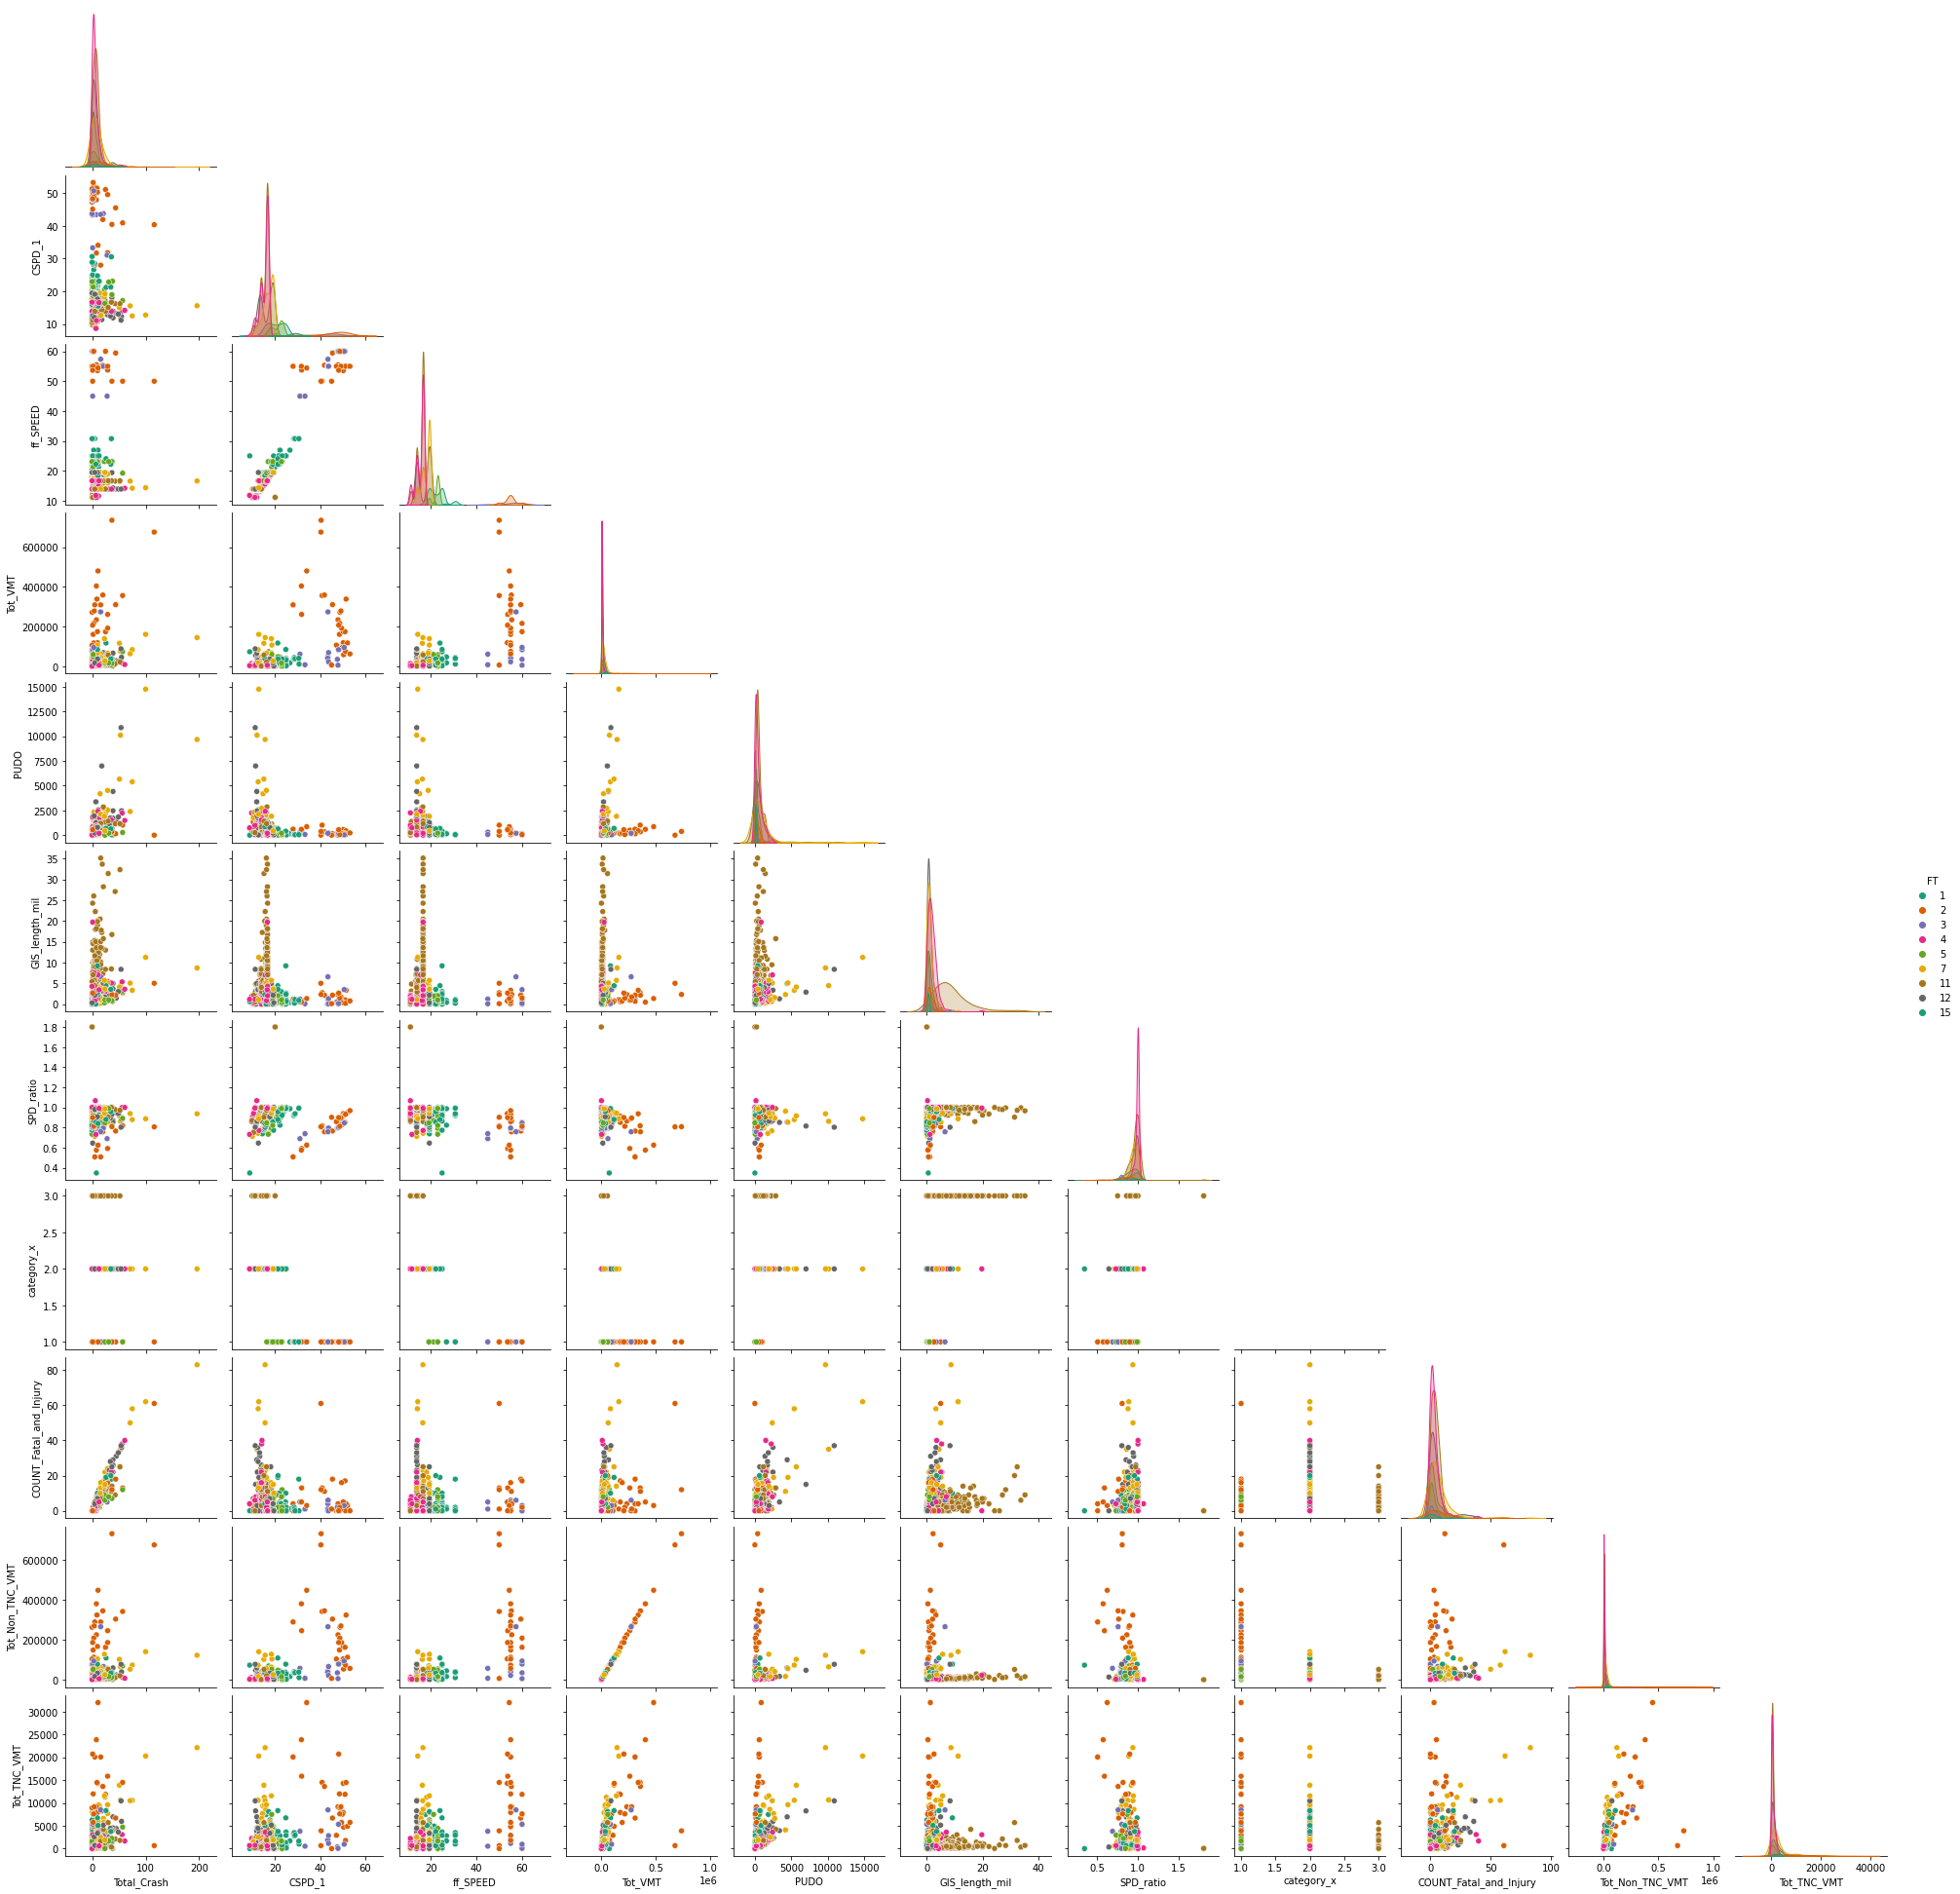

In [7]:
# df2010_tractce = df2010.loc[df2010["tractce10"]=="018000", ["Total_Crash","CSPD_1","SPEED","Tot_VMT","PUDO","category_x","GIS_length_mil"]]
df2016_tractce = df2016.loc[:, ["Total_Crash","CSPD_1","ff_SPEED","Tot_VMT","PUDO","GIS_length_mil","SPD_ratio","FT","category_x","COUNT_Fatal_and_Injury","Tot_Non_TNC_VMT","Tot_TNC_VMT"]]
# df2010_tractce["FT"] =df2010_tractce["FT"].astype("int")
# sns.pairplot(df2010_tractce, hue="FT", corner=True,hue_order=df2010_tractce["FT"].sort_values().unique())
sns.pairplot(df2016_tractce, hue="FT", corner=True,palette='Dark2')
# Saving the Seaborn Figure:
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"YR2016_PairPlots.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [22]:
dfmerged_tractce

,Total_Crash,CSPD_1,SPEED,Tot_VMT,PUDO,GIS_length_mil,SPD_ratio,FT,category_x,COUNT_Fatal_and_Injury,new_SPD_ratio,ff_SPEED
0,2.0,13.276043,25.0,4463.114265,0.00000,5.896452,0.531042,11,3,2.0,0.955875,13.888889
1,7.0,13.459338,25.0,5165.916246,1357.81665,5.896452,0.538374,11,3,6.0,0.969072,13.888889
2,0.0,13.766533,25.0,1099.667540,0.00000,0.173912,0.550661,12,2,0.0,0.991190,13.888889
3,0.0,13.729277,25.0,1211.706175,264.86663,0.173912,0.549171,12,2,0.0,0.988508,13.888889
4,2.0,19.275762,35.0,8208.400844,0.00000,0.969066,0.550736,15,2,2.0,0.991333,19.444286
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,13.0,16.514938,30.0,4479.293681,189.41669,3.435216,0.550498,4,2,5.0,0.990896,16.666667
1701,41.0,23.007183,30.0,5624.380379,0.00000,1.008806,0.766906,5,1,13.0,0.996978,23.076923
1702,31.0,22.899825,30.0,7212.722043,204.89999,1.008806,0.763328,5,1,8.0,0.992326,23.076923
1703,16.0,19.371497,35.0,15834.083209,0.00000,3.624432,0.553471,7,2,8.0,0.996257,19.444285


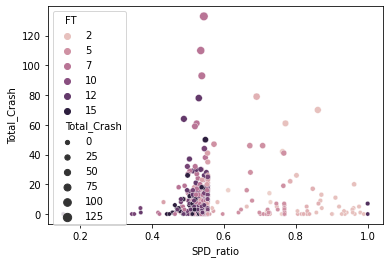

In [126]:
# CSPD vs
# df2010_tractce["VMT_10k"] =df2010_tractce["Tot_VMT"].divide(10000)
sns.scatterplot(data=df2010_tractce, x="SPD_ratio", y="Total_Crash",size="Total_Crash",hue="FT")
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"YR2010_SPD_ratio_vs_TotalCrash.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [ ]:
#Observations
# CSPD vs Crash --> FT = 7 (major arterial) , CT = "018000" has maximum crashes = 133 (CT near the bridge)
# High (~100) and low (00 mph) are Bike pathways
# high CSPD corresponds to freeways/expressways where CSPD = 0.85-0.95% of SPEED; this is also where crashes are few (outliers 61 and 70)
# Super arterial and Minor Arterial hve reasonably large number of crashes even when CSPD is 50% of SPEED (or lower)



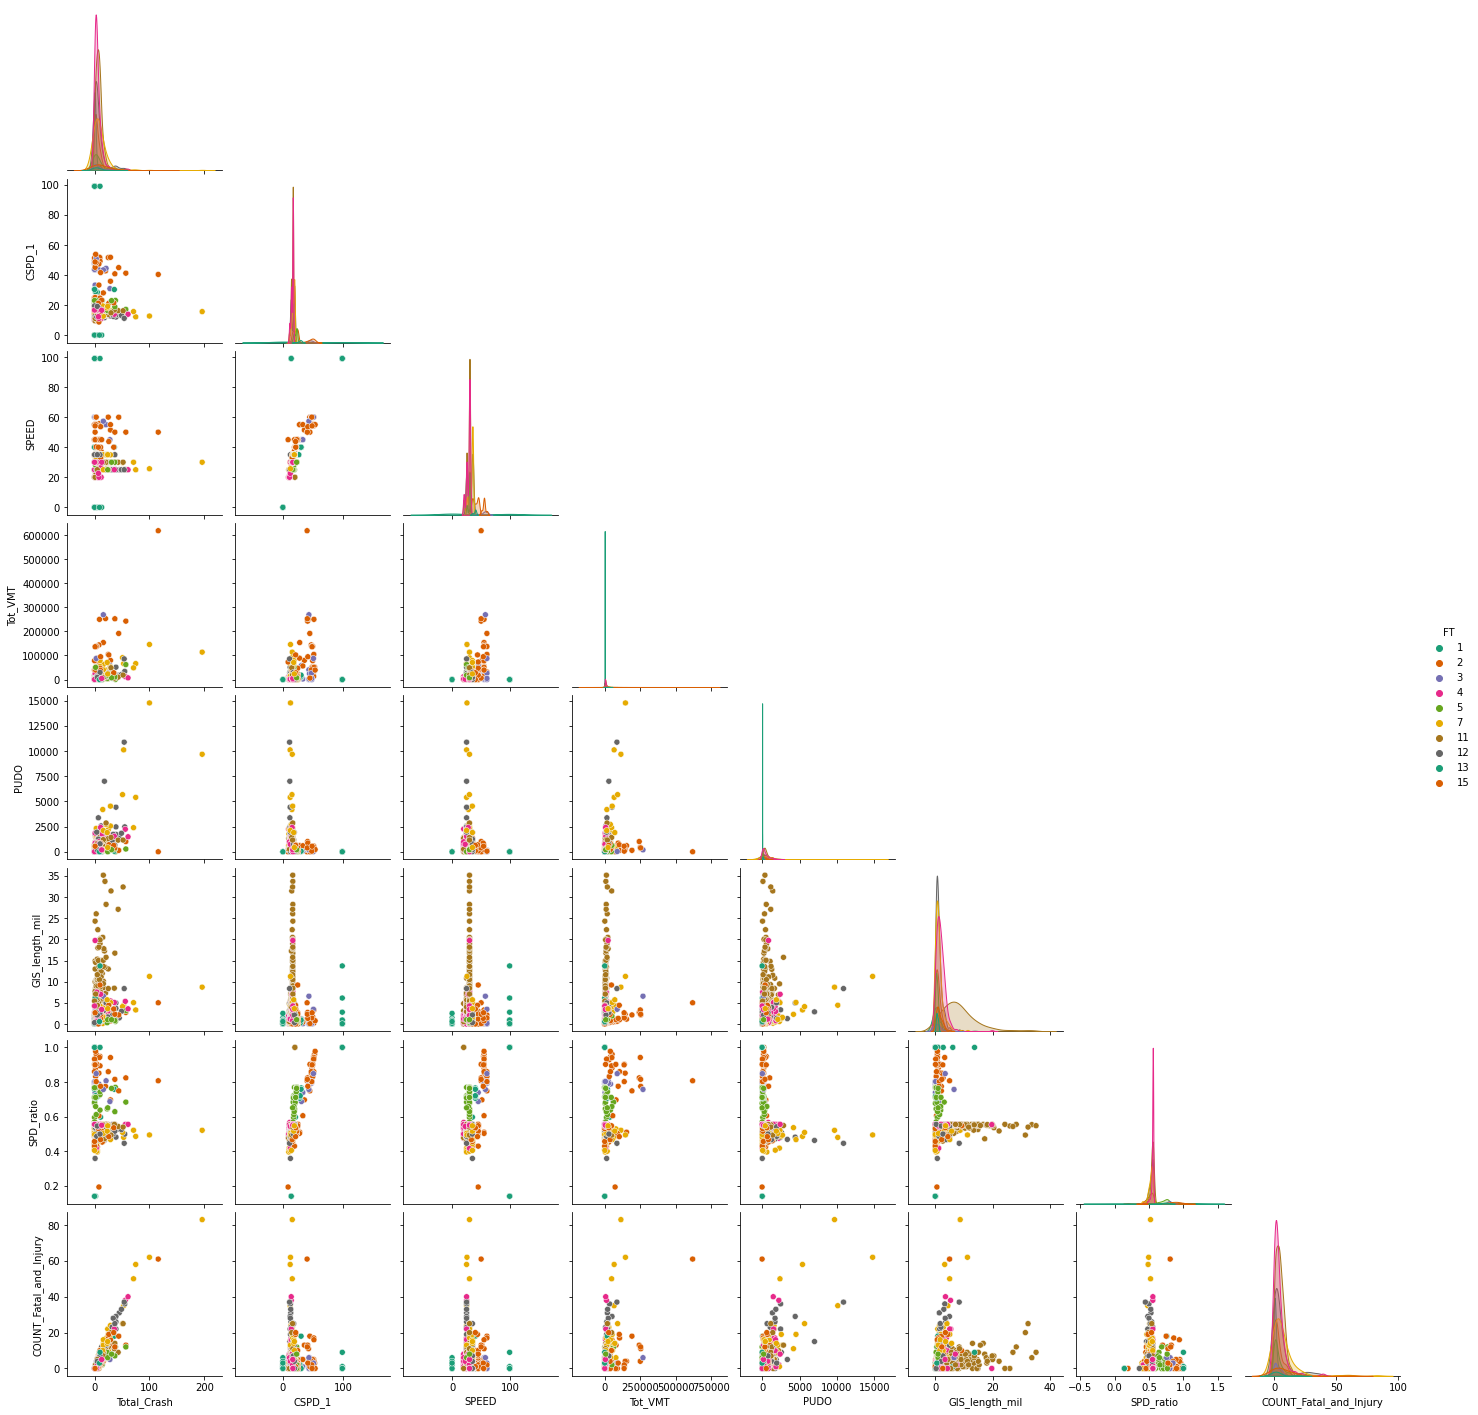

In [119]:
df2016_tractce = df2016.loc[:, ["Total_Crash","CSPD_1","SPEED","Tot_VMT","PUDO","GIS_length_mil","SPD_ratio","FT","category_x","COUNT_Fatal_and_Injury"]]
sns.pairplot(df2016_tractce, hue="FT", corner=True,palette='Dark2')
# Saving the Seaborn Figure:
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"YR2016_PairPlots.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

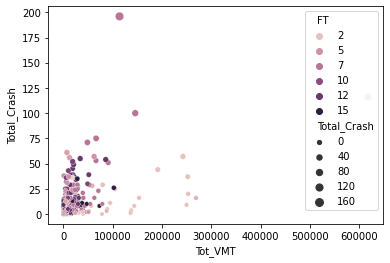

In [133]:
# CSPD vs
# df2010_tractce["VMT_10k"] =df2010_tractce["Tot_VMT"].divide(10000)
sns.scatterplot(data=df2016_tractce, x="Tot_VMT", y="Total_Crash",size="Total_Crash",hue="FT")
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"YR2016_Tot_VMT_vs_TotalCrash.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [ ]:
df2016.loc[df2016["category_x"]=="1",["tractce10_FT","SPEED","CSPD_1","Tot_VMT"]]

In [ ]:
df2010.loc[df2010["tractce10"]=="016500",:]

In [ ]:
df2016.loc[df2016["tractce10"]=="016500",:]

In [ ]:
df2010_tractce

In [ ]:
df2016_tractce

In [ ]:
# get the max crashes --> tractce10
df2016.loc[df2016["Total_Crash"].idxmax()] # '018000'



In [ ]:
df2016["Total_Crash"].idxmax()

In [ ]:
# Sample work

In [ ]:
df2010AM = gpd.read_file(BASE_DIR.parent.joinpath("2010","2010_AM.shp"))
df2010AM.to_crs(3857,inplace=True)
# print(df2010AM.columns.to_list())
add_for_Tot_Vol = ['V1_1', 'V2_1', 'V3_1', 'V4_1', 'V5_1', 'V6_1', 'V7_1', 'V8_1', 'V9_1', 'V10_1', 'V11_1', 'V12_1',
                   'BUSVOL_AM','BUSVOL_PM','BUSVOL_EA','BUSVOL_MD','BUSVOL_EV']
df2010AM["Tot_Vol"] = df2010AM[add_for_Tot_Vol].sum(axis=1)
df2010AM["GIS_length"] = df2010AM.geometry.length * 0.000621371

In [ ]:
df2010AM.loc[df2010AM["FT"].isin([1,2,3,4,5,7,9,10,11,12,13,15]),["TIME","TIME_1","SPEED","CAP","DISTANCE","FT","CSPD_1","VC_1","Tot_Vol","GIS_length"]]

In [ ]:
# FUNCTION TC[5]  = T0*1.3*(1 + 0.88*(0.348*V/C)^5.5)+(LI.TOLLTIME*V/C)
# 0.89312 = 0.68702 * 1.3 * (1 + 0.88*(0.348*247.28627/1400)^5.5) + (LI.TOLLTIME * 247.28627/1400)

In [ ]:
# FUNCTION TC[7]  = T0*1.8*(1 + 0.60*(0.348*V/C)^3.5)+(LI.TOLLTIME*V/C)
# 0.54132 = 0.97438 * 1.8 * (1 + 0.60*(0.348*225.50792/950)^5.5) + (LI.TOLLTIME * 225.50792/950)